In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle

from datetime import timedelta
from datetime import datetime
from datetime import date
from datetime import time

from tqdm import tqdm
import scipy.stats as st

In [8]:
df_transf0 = pd.read_csv("DATA_RESULTS/df_GRADY_RBCT_extractedFeat_NoImputated_tau9_v3.csv")
df_transf0.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

In [9]:
df_transf0.drop_duplicates(inplace=True)
df_transf0.shape

(6375, 46)

# Eliminated the patients having pre-transfusion SF, Hb, SpO2, PF missing

In [10]:
print(df_transf0[['med_spo2_beforeT', 'med_Hb_beforeT', 'med_SF_beforeT','med_PF_beforeT']].isnull().all(axis=1).sum())

df_transf = df_transf0[~df_transf0[['med_spo2_beforeT', 'med_Hb_beforeT', 'med_SF_beforeT','med_PF_beforeT']].isnull().all(axis=1)]
df_transf.reset_index(drop=True, inplace=True)
print(df_transf.shape)

print(len(df_transf0.pat_id.unique()), len(df_transf0.csn.unique()), len(df_transf.pat_id.unique()), len(df_transf.csn.unique()))

0
(6375, 46)
3552 3757 3552 3757


In [ ]:
df_transf

In [3]:
df_transf[df_transf.med_spo2_beforeT.isnull()].shape

(0, 48)

In [4]:
df_transf.med_SF_beforeT.isnull().sum()

0

In [5]:
(pd.to_datetime(df_transf.transfusion_end) - pd.to_datetime(df_transf.transfusion_start)).mean()

Timedelta('0 days 05:56:32.771165129')

In [6]:
(pd.to_datetime(df_transf.transfusion_end) - pd.to_datetime(df_transf.transfusion_start)).median()

Timedelta('0 days 02:08:00')

In [7]:
df_transf.loc[:,'Hb':].max()

Hb                    16.650000
med_spo2_beforeT     100.000000
med_Hb_beforeT        18.000000
med_SF_beforeT       476.190476
med_PF_beforeT      2642.857143
MSPO2_afterT1        100.000000
MSPO2_afterT2        100.000000
MSPO2_afterT3        100.000000
MHB_afterT1           19.100000
MHB_afterT2           19.600000
MHB_afterT3           20.300000
MSF_afterT1          476.190476
MSF_afterT2          476.190476
MSF_afterT3          476.190476
MPF_afterT1         2642.857143
MPF_afterT2         2642.857143
MPF_afterT3         2642.857143
del_SPO2_1            38.000000
del_SPO2_2            37.000000
del_SPO2_3            37.000000
del_Hb_1              11.600000
del_Hb_2              13.200000
del_Hb_3              14.300000
del_SF_1             328.571429
del_SF_2             371.666667
del_SF_3             378.190476
del_PF_1            2244.452381
del_PF_2            1644.452381
del_PF_3            1644.452381
dtype: float64

In [8]:
df_transf['MSF_beforeT']=df_transf['med_SF_beforeT']
# df_transf.pop('med_SF_beforeT')
df_transf['MSF_beforeT']

0       357.142857
1       245.625000
2       219.444444
3       250.000000
4       245.000000
           ...    
6370    447.619048
6371    466.122449
6372    469.642857
6373    442.857143
6374    166.666667
Name: MSF_beforeT, Length: 6375, dtype: float64

## Delta SF vs baseline Hb for 4 pre-SF ranges and 3 time-horizons

In [9]:
cond1 =  df_transf['MSF_beforeT']>0 
cond2 = df_transf['MSF_beforeT']<=100
cond12 = cond1 & cond2
# MSFbaseline_gp1 = df_transf['MSF_beforeT'][cond12]
MSFbaseline_gp1 =  pd.Series(np.where(cond12, df_transf['MSF_beforeT'], None))

In [10]:
# MSFbaseline_gp2[~MSFbaseline_gp2.isnull()]

In [11]:
del cond1, cond2, cond12

In [12]:
cond1 =  df_transf['MSF_beforeT']>100 
cond2 = df_transf['MSF_beforeT']<=200
cond12 = cond1 & cond2
# MSFbaseline_gp2 = df_transf['MSF_beforeT'][cond12]
MSFbaseline_gp2 =  pd.Series(np.where(cond12, df_transf['MSF_beforeT'], None))

In [13]:
del cond1, cond2, cond12
cond1 =  df_transf['MSF_beforeT']>200 
cond2 = df_transf['MSF_beforeT']<=300
cond12 = cond1 & cond2
# MSFbaseline_gp3 = df_transf['MSF_beforeT'][cond12]
MSFbaseline_gp3 =  pd.Series(np.where(cond12, df_transf['MSF_beforeT'], None))

In [14]:
del cond1, cond2, cond12
cond12 =  df_transf['MSF_beforeT']>300 
# MSFbaseline_gp4 = df_transf['MSF_beforeT'][cond12]
MSFbaseline_gp4 =  pd.Series(np.where(cond12, df_transf['MSF_beforeT'], None))

In [15]:
# df_transf['MSF_afterT1']#
zx = df_transf['MSF_afterT1'] - MSFbaseline_gp1
zx.isnull().sum()

5924

In [16]:
len(df_transf['MSF_afterT1'])

6375

In [17]:
len(MSFbaseline_gp1)

6375

In [18]:
zx

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
6370    NaN
6371    NaN
6372    NaN
6373    NaN
6374    NaN
Length: 6375, dtype: object

In [19]:
df_transf['del_SF_1a']=df_transf['MSF_afterT1'] - MSFbaseline_gp1
df_transf['del_SF_2a']=df_transf['MSF_afterT2'] - MSFbaseline_gp1
df_transf['del_SF_3a']=df_transf['MSF_afterT3'] - MSFbaseline_gp1

In [20]:
# aa = df_transf['del_SF_1a']
# bb = aa[~np.isnan(aa)]
# cc = (np.array(aa[bb.index]))

# aa1 = df_transf['Hb']
# cc1 = (np.array(aa1[bb.index]))

# print(len(cc))
# print(len(cc1))
# plt.scatter(cc, cc1,color='black')

In [21]:
df_transf['del_SF_1b']=df_transf['MSF_afterT1'] - MSFbaseline_gp2
df_transf['del_SF_2b']=df_transf['MSF_afterT2'] - MSFbaseline_gp2
df_transf['del_SF_3b']=df_transf['MSF_afterT3'] - MSFbaseline_gp2

In [22]:
df_transf['del_SF_1c']=df_transf['MSF_afterT1'] - MSFbaseline_gp3
df_transf['del_SF_2c']=df_transf['MSF_afterT2'] - MSFbaseline_gp3
df_transf['del_SF_3c']=df_transf['MSF_afterT3'] - MSFbaseline_gp3

In [23]:
df_transf['del_SF_1d']=df_transf['MSF_afterT1'] - MSFbaseline_gp4
df_transf['del_SF_2d']=df_transf['MSF_afterT2'] - MSFbaseline_gp4
df_transf['del_SF_3d']=df_transf['MSF_afterT3'] - MSFbaseline_gp4

(-400.0, 400.0)

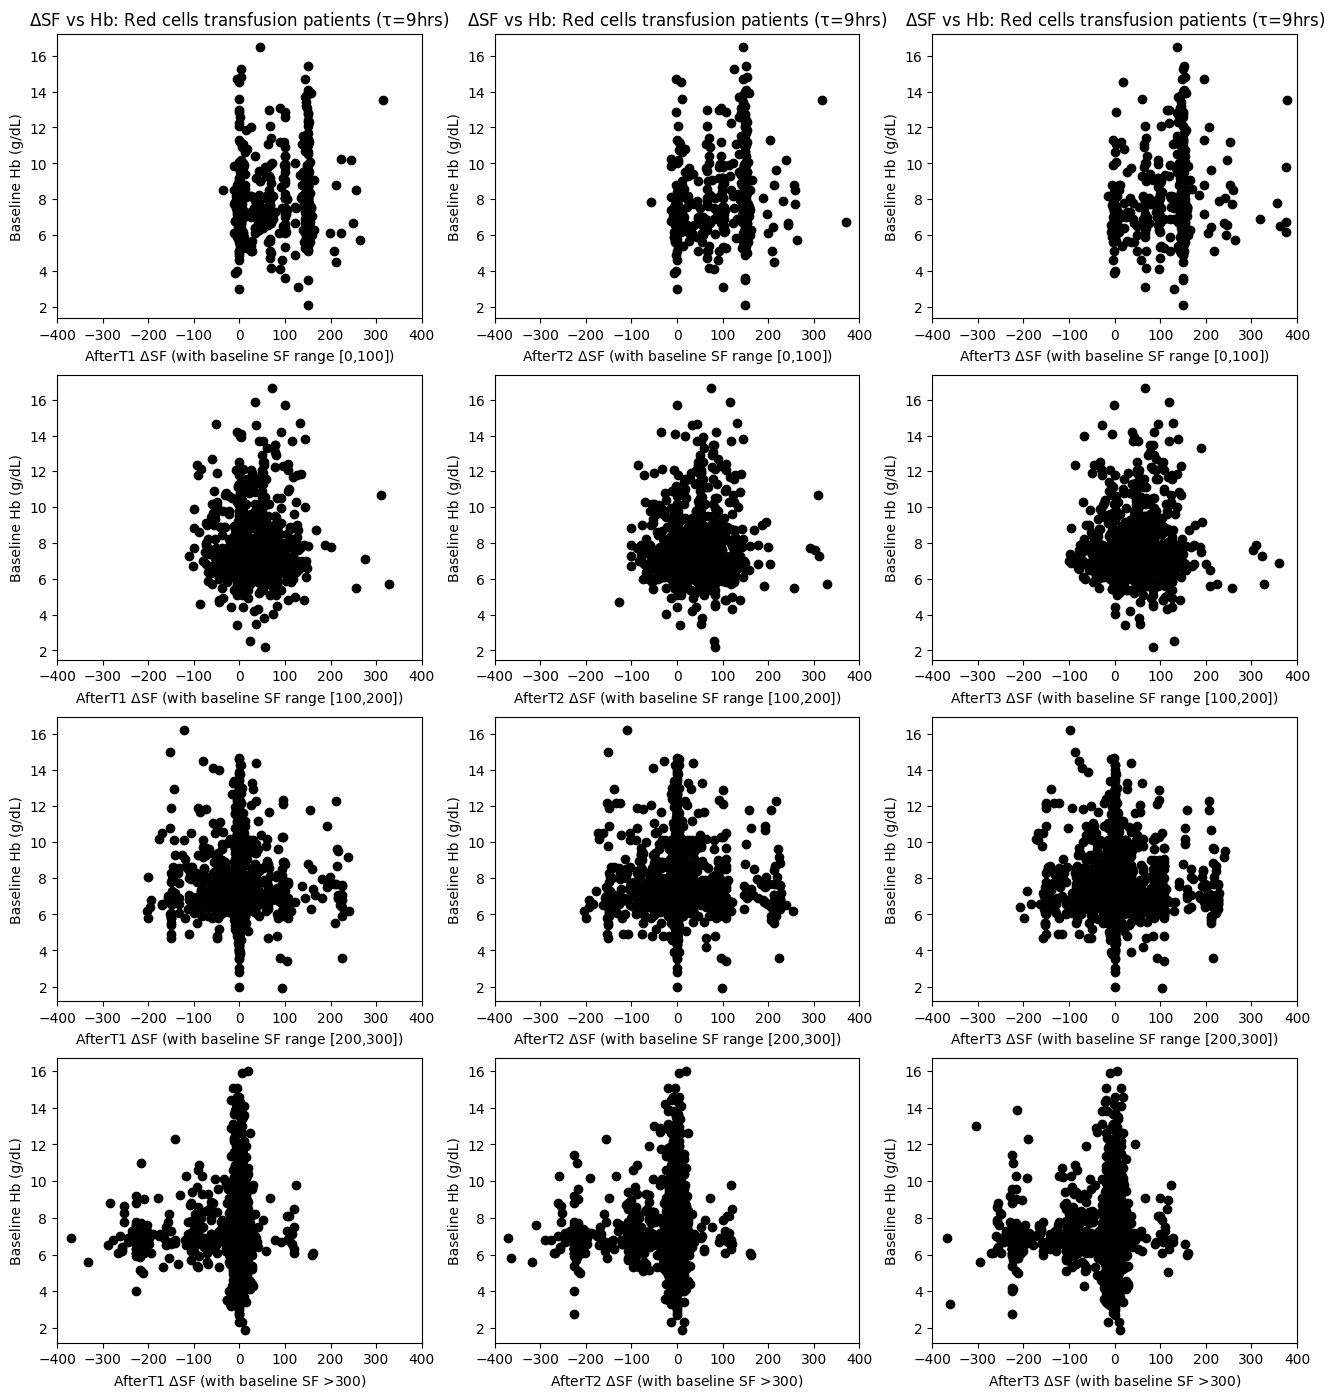

In [24]:
fig, axs = plt.subplots(4, 3, figsize =(16, 17))

axs[0,0].scatter(df_transf['del_SF_1a'], df_transf['Hb'],color='black')
axs[0,0].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[0,0].set_xlabel('AfterT1 $\Delta$SF (with baseline SF range [0,100])')
axs[0,0].set_ylabel('Baseline Hb (g/dL)')
axs[0,0].set_xlim([-400, 400])

axs[0,1].scatter(df_transf['del_SF_2a'], df_transf['Hb'],color='black')
axs[0,1].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[0,1].set_xlabel('AfterT2 $\Delta$SF (with baseline SF range [0,100])')
axs[0,1].set_ylabel('Baseline Hb (g/dL)')
axs[0,1].set_xlim([-400, 400])

axs[0,2].scatter(df_transf['del_SF_3a'], df_transf['Hb'],color='black')
axs[0,2].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[0,2].set_xlabel('AfterT3 $\Delta$SF (with baseline SF range [0,100])')
axs[0,2].set_ylabel('Baseline Hb (g/dL)')
axs[0,2].set_xlim([-400, 400])

axs[1,0].scatter(df_transf['del_SF_1b'], df_transf['Hb'],color='black')
#axs[1,0].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[1,0].set_xlabel('AfterT1 $\Delta$SF (with baseline SF range [100,200])')
axs[1,0].set_ylabel('Baseline Hb (g/dL)')
axs[1,0].set_xlim([-400, 400])

axs[1,1].scatter(df_transf['del_SF_2b'], df_transf['Hb'],color='black')
#axs[1,1].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[1,1].set_xlabel('AfterT2 $\Delta$SF (with baseline SF range [100,200])')
axs[1,1].set_ylabel('Baseline Hb (g/dL)')
axs[1,1].set_xlim([-400, 400])

axs[1,2].scatter(df_transf['del_SF_3b'], df_transf['Hb'],color='black')
#axs[1,2].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[1,2].set_xlabel('AfterT3 $\Delta$SF (with baseline SF range [100,200])')
axs[1,2].set_ylabel('Baseline Hb (g/dL)')
axs[1,2].set_xlim([-400, 400])

axs[2,0].scatter(df_transf['del_SF_1c'], df_transf['Hb'],color='black')
#axs[2,0].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[2,0].set_xlabel('AfterT1 $\Delta$SF (with baseline SF range [200,300])')
axs[2,0].set_ylabel('Baseline Hb (g/dL)')
axs[2,0].set_xlim([-400, 400])

axs[2,1].scatter(df_transf['del_SF_2c'], df_transf['Hb'],color='black')
#axs[2,1].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[2,1].set_xlabel('AfterT2 $\Delta$SF (with baseline SF range [200,300])')
axs[2,1].set_ylabel('Baseline Hb (g/dL)')
axs[2,1].set_xlim([-400, 400])

axs[2,2].scatter(df_transf['del_SF_3c'], df_transf['Hb'],color='black')
#axs[2,2].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[2,2].set_xlabel('AfterT3 $\Delta$SF (with baseline SF range [200,300])')
axs[2,2].set_ylabel('Baseline Hb (g/dL)')
axs[2,2].set_xlim([-400, 400])

axs[3,0].scatter(df_transf['del_SF_1d'], df_transf['Hb'],color='black')
#axs[3,0].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[3,0].set_xlabel('AfterT1 $\Delta$SF (with baseline SF >300)')
axs[3,0].set_ylabel('Baseline Hb (g/dL)')
axs[3,0].set_xlim([-400, 400])

axs[3,1].scatter(df_transf['del_SF_2d'], df_transf['Hb'],color='black')
#axs[3,1].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[3,1].set_xlabel('AfterT2 $\Delta$SF (with baseline SF >300)')
axs[3,1].set_ylabel('Baseline Hb (g/dL)')
axs[3,1].set_xlim([-400, 400])

axs[3,2].scatter(df_transf['del_SF_3d'], df_transf['Hb'],color='black')
#axs[3,2].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[3,2].set_xlabel('AfterT3 $\Delta$SF (with baseline SF >300)')
axs[3,2].set_ylabel('Baseline Hb (g/dL)')
axs[3,2].set_xlim([-400, 400])

# plt.savefig('DATA_RESULTS/delSFvsHb_RedCellsT_Grady.tif',format="tif", bbox_inches="tight", dpi=300)

**Analysis: (1) % improvement in SF (for baseline SF 1-100 and >300) with 95% CI, (b) Association b/w Hb vs delSF**

In [25]:
#for baseline SF 1-100
dSF1a = df_transf['del_SF_1a'][~df_transf['del_SF_1a'].isnull()]
dSF2a = df_transf['del_SF_2a'][~df_transf['del_SF_2a'].isnull()]
dSF3a = df_transf['del_SF_3a'][~df_transf['del_SF_3a'].isnull()]

#calculating the 95% confidence interval of the mean of array dSF1a
CI1a = st.t.interval(0.95, len(dSF1a)-1, loc=dSF1a.mean(), scale=st.sem(dSF1a, nan_policy='omit'))
CI2a = st.t.interval(0.95, len(dSF2a)-1, loc=dSF2a.mean(), scale=st.sem(dSF2a, nan_policy='omit'))
CI3a = st.t.interval(0.95, len(dSF3a)-1, loc=dSF3a.mean(), scale=st.sem(dSF3a, nan_policy='omit'))
print(f'For baseline SF (1-100), mean increase in SF for T1 with 95% CI: ',dSF1a.mean(),CI1a)
print(f'For baseline SF (1-100), mean increase in SF for T2 with 95% CI: ',dSF2a.mean(),CI2a)
print(f'For baseline SF (1-100), mean increase in SF for T3 with 95% CI: ',dSF3a.mean(),CI3a)

For baseline SF (1-100), mean increase in SF for T1 with 95% CI:  72.23738132084445 (65.86663652691865, 78.60812611477024)
For baseline SF (1-100), mean increase in SF for T2 with 95% CI:  95.45081369001532 (88.97292155091853, 101.92870582911212)
For baseline SF (1-100), mean increase in SF for T3 with 95% CI:  113.89019674680144 (107.36056180751659, 120.41983168608628)


In [26]:
dSF1a

20       60.333333
40           146.0
58           150.0
101           -2.0
107           -4.5
           ...    
6228         224.0
6236         154.0
6288          99.0
6331    163.803855
6352    248.214286
Name: del_SF_1a, Length: 451, dtype: object

In [27]:
#for baseline SF 101-200
dSF1b = df_transf['del_SF_1b'][~df_transf['del_SF_1b'].isnull()]
dSF2b = df_transf['del_SF_2b'][~df_transf['del_SF_2b'].isnull()]
dSF3b = df_transf['del_SF_3b'][~df_transf['del_SF_3b'].isnull()]

#calculating the 95% confidence interval of the mean of array dSF1a
CI1b = st.t.interval(0.95, len(dSF1b)-1, loc=dSF1b.mean(), scale=st.sem(dSF1b, nan_policy='omit'))
CI2b = st.t.interval(0.95, len(dSF2b)-1, loc=dSF2b.mean(), scale=st.sem(dSF2b, nan_policy='omit'))
CI3b = st.t.interval(0.95, len(dSF3b)-1, loc=dSF2b.mean(), scale=st.sem(dSF3b, nan_policy='omit'))

In [28]:
#for baseline SF 201-300
dSF1c = df_transf['del_SF_1c'][~df_transf['del_SF_1c'].isnull()]
dSF2c = df_transf['del_SF_2c'][~df_transf['del_SF_2c'].isnull()]
dSF3c = df_transf['del_SF_3c'][~df_transf['del_SF_3c'].isnull()]

#calculating the 95% confidence interval of the mean of array dSF1a
CI1c = st.t.interval(0.95, len(dSF1c)-1, loc=dSF1c.mean(), scale=st.sem(dSF1c, nan_policy='omit'))
CI2c = st.t.interval(0.95, len(dSF2c)-1, loc=dSF2c.mean(), scale=st.sem(dSF2c, nan_policy='omit'))
CI3c = st.t.interval(0.95, len(dSF3c)-1, loc=dSF2c.mean(), scale=st.sem(dSF3c, nan_policy='omit'))

In [29]:
#for baseline SF >300
dSF1d = df_transf['del_SF_1d'][~df_transf['del_SF_1d'].isnull()]
dSF2d = df_transf['del_SF_2d'][~df_transf['del_SF_2d'].isnull()]
dSF3d = df_transf['del_SF_3d'][~df_transf['del_SF_3d'].isnull()]

#calculating the 95% confidence interval of the mean of array dSF1a
CI1d = st.t.interval(0.95, len(dSF1d)-1, loc=dSF1d.mean(), scale=st.sem(dSF1d, nan_policy='omit'))
CI2d = st.t.interval(0.95, len(dSF2d)-1, loc=dSF2d.mean(), scale=st.sem(dSF2d, nan_policy='omit'))
CI3d = st.t.interval(0.95, len(dSF3d)-1, loc=dSF2d.mean(), scale=st.sem(dSF3d, nan_policy='omit'))
print(f'For baseline SF>300, mean increase in SF for T1 with 95% CI: ',dSF1d.mean(),CI1d)
print(f'For baseline SF>300, mean increase in SF for T2 with 95% CI: ',dSF2d.mean(),CI2d)
print(f'For baseline SF>300, mean increase in SF for T3 with 95% CI: ',dSF3d.mean(),CI3d)

For baseline SF>300, mean increase in SF for T1 with 95% CI:  -12.513746065267405 (-14.541120387692402, -10.486371742842408)
For baseline SF>300, mean increase in SF for T2 with 95% CI:  -17.894125413031347 (-20.272389379772594, -15.515861446290101)
For baseline SF>300, mean increase in SF for T3 with 95% CI:  -22.81512257314648 (-20.54991829094591, -15.238332535116784)


In [30]:
df_transf['del_SF_1d'].max()

160.41666666666669

In [31]:
a1 = np.array([1,2,3,np.nan, np.nan,5])
a2 = np.array([9,np.nan,8,np.nan, np.nan,np.nan])

In [32]:
cond = ~np.isnan(a1+a2)
a1 = a1[cond]
a2 = a2[cond]
a1, a2

(array([1., 3.]), array([9., 8.]))

In [33]:
a1

array([1., 3.])

In [34]:
from sklearn.metrics import r2_score

In [35]:
def r2Score(y, f): #y:actual, f:predicted
    # SSres = sum(map(lambda x: (x[0]-x[1])**2, zip(y, f)))
    # SStot = sum([(x-np.mean(y))**2 for x in y])
    # r2 = 1-(SSres/SStot)
    
    cond = ~np.isnan(np.array(y+f, dtype='float'))
    y = y[cond]
    f = f[cond]
    
    
    ssres = sum((y - f)**2)
    sstot = sum((y-np.mean(y))**2)
    r2 = 1-(ssres/sstot)
    
    return r2

In [36]:
#R2 (R2 = 1- SSres/SStotal) of delta SF vs baseline Hb 
id1a = np.array(dSF1a.index)
mdSF1a = np.array(dSF1a)    #[~np.isnan(MSFbaseline_gp1)]
mHb1a = np.array(df_transf['Hb'][id1a])
r2_1a = r2Score(mdSF1a, mHb1a)

id2a = np.array(dSF2a.index)
mdSF2a = np.array(dSF2a)    
mHb2a = np.array(df_transf['Hb'][id2a])
r2_2a = r2Score(mdSF2a, mHb2a)

id3a = np.array(dSF3a.index)
mdSF3a = np.array(dSF3a)    
mHb3a = np.array(df_transf['Hb'][id3a])
r2_3a = r2Score(mdSF3a, mHb3a)


print('r2 score for mdSF1a, mHb1a is', r2_1a)
print('r2 score for mdSF2a, mHb2a is', r2_2a)
print('r2 score for mdSF3a, mHb3a is', r2_3a)

r2 score for mdSF1a, mHb1a is -0.8653718996745787
r2 score for mdSF2a, mHb2a is -1.5574759657414807
r2 score for mdSF3a, mHb3a is -2.2510877523217294


In [37]:
# print(r2_score(mdSF1a, mHb1a))
# print(r2_score(mdSF2a, mHb2a))
# print(r2_score(mdSF3a, mHb3a))

In [38]:
id1b = np.array(dSF1b.index)
mHb1b = np.array(df_transf['Hb'][id1b])
id2b = np.array(dSF2b.index)
mHb2b = np.array(df_transf['Hb'][id2b])
id3b = np.array(dSF3b.index)
mHb3b = np.array(df_transf['Hb'][id3b])

id1c = np.array(dSF1c.index)
mHb1c = np.array(df_transf['Hb'][id1c])
id2c = np.array(dSF2c.index)
mHb2c = np.array(df_transf['Hb'][id2c])
id3c = np.array(dSF3c.index)
mHb3c = np.array(df_transf['Hb'][id3c])

In [39]:
#R2 (R2 = 1- SSres/SStotal) of delta SF vs baseline Hb 
id1d = np.array(dSF1d.index)
mdSF1d = np.array(dSF1d)    #[~np.isnan(MSFbaseline_gp1)]
mHb1d = np.array(df_transf['Hb'][id1d])
r2_1d = r2Score(mdSF1d, mHb1d)

id2d = np.array(dSF2d.index)
mdSF2d = np.array(dSF2d)    
mHb2d = np.array(df_transf['Hb'][id2d])
r2_2d = r2Score(mdSF2d, mHb2d)

id3d = np.array(dSF3d.index)
mdSF3d = np.array(dSF3d)    
mHb3d = np.array(df_transf['Hb'][id3d])
r2_3d = r2Score(mdSF3d, mHb3d)


print('r2 score for mdSF1d, mHb1d is', r2_1d)
print('r2 score for mdSF2d, mHb2d is', r2_2d)
print('r2 score for mdSF3d, mHb3d is', r2_3d)

r2 score for mdSF1d, mHb1d is -0.16659143482261052
r2 score for mdSF2d, mHb2d is -0.19635311753777107
r2 score for mdSF3d, mHb3d is -0.2250750191129014


In [40]:
df_transf['Hb'].max()


16.65

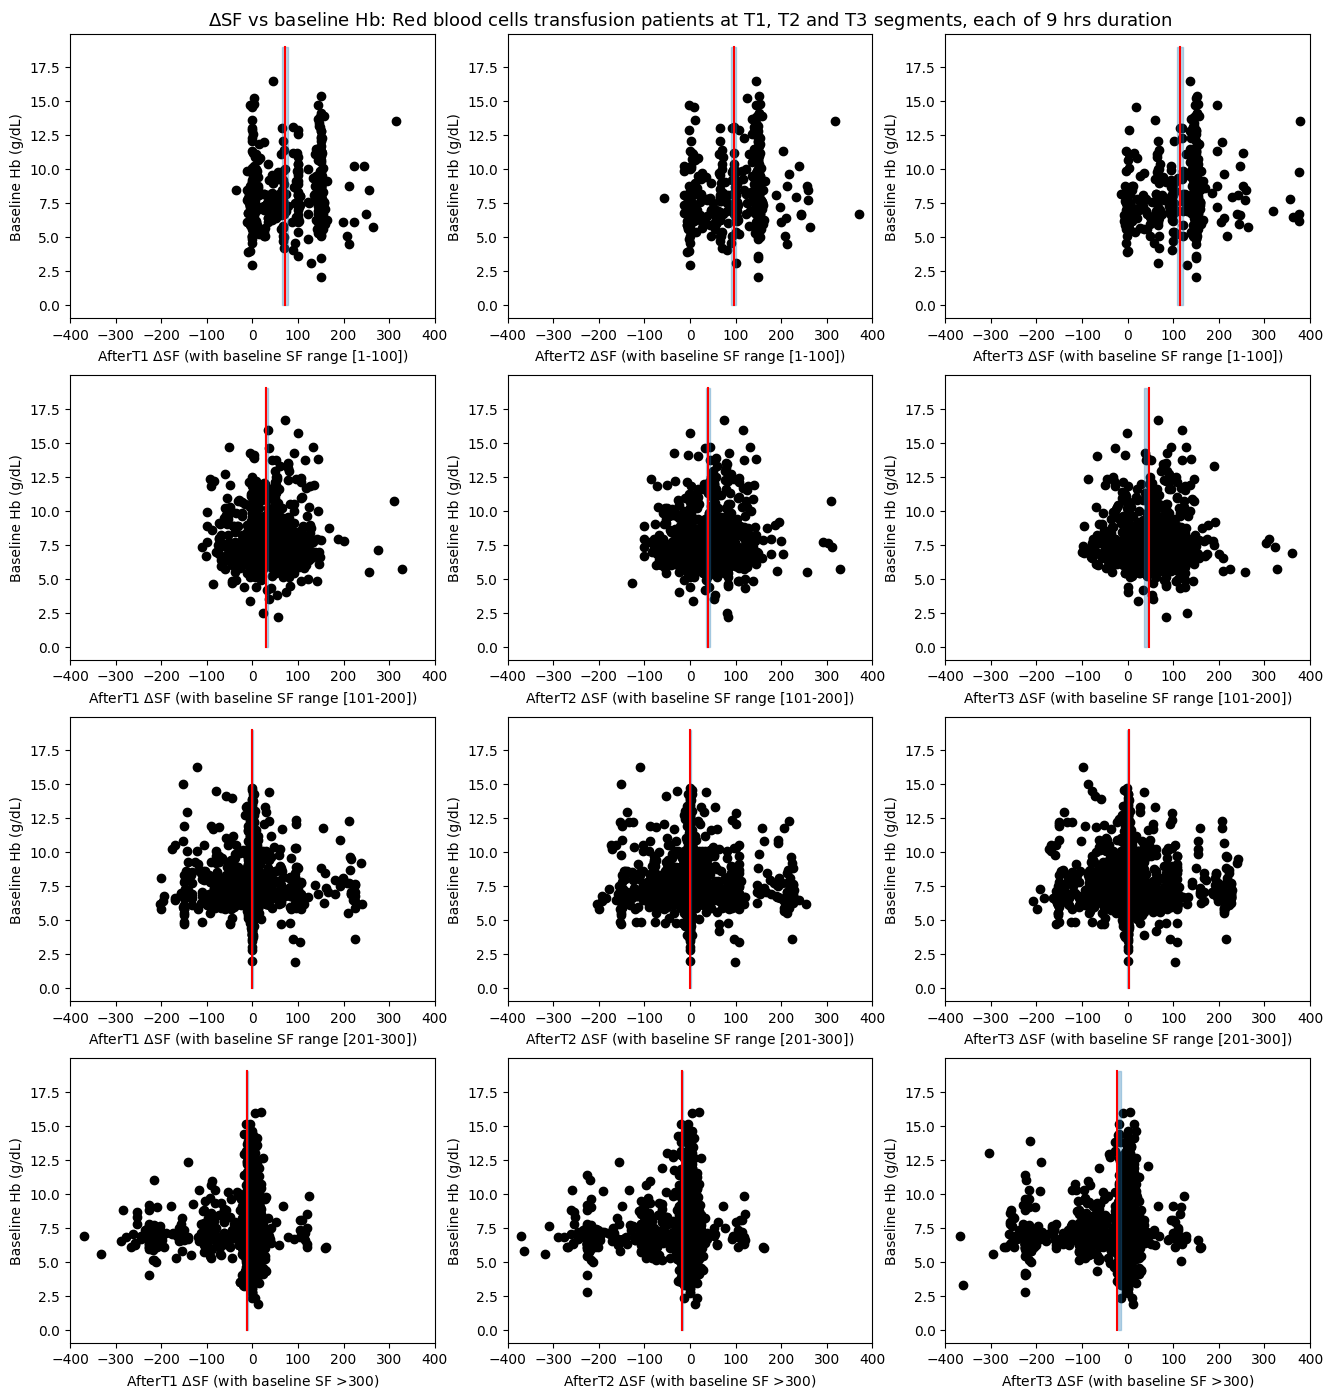

In [41]:
fig, axs = plt.subplots(4, 3, figsize =(16, 17))
line1 = np.arange(20)

axs[0,0].scatter(df_transf['del_SF_1a'], df_transf['Hb'],color='black')
#axs[0,0].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[0,0].set_xlabel('AfterT1 $\Delta$SF (with baseline SF range [1-100])')
axs[0,0].set_ylabel('Baseline Hb (g/dL)')
axs[0,0].set_xlim([-400, 400])
# axs[0,0].set_ylim([df_transf['Hb'].min()-0.5, df_transf['Hb'].max()+0.5])
axs[0,0].plot(np.mean(dSF1a)*np.ones(20), line1,color='red')
axs[0,0].fill_betweenx(line1, CI1a[0], CI1a[1], color='C0', alpha=0.3)


axs[0,1].scatter(df_transf['del_SF_2a'], df_transf['Hb'],color='black')
axs[0,1].set_title('$\Delta$SF vs baseline Hb: Red blood cells transfusion patients at T1, T2 and T3 segments, each of 9 hrs duration', fontsize = 13)#\u03C4=9hrs
axs[0,1].set_xlabel('AfterT2 $\Delta$SF (with baseline SF range [1-100])')
axs[0,1].set_ylabel('Baseline Hb (g/dL)')
axs[0,1].set_xlim([-400, 400])
# axs[0,1].set_ylim([np.min(mHb2a)-0.5, np.max(mHb2a)+0.5])
axs[0,1].plot(np.mean(dSF2a)*np.ones(20), line1,color='red')
#axs[0,1].plot(CI2a[0]*np.ones(20), line1,'g:',CI2a[1]*np.ones(20), line1,'g:')
axs[0,1].fill_betweenx(line1, CI2a[0], CI2a[1], color='C0', alpha=0.3)


axs[0,2].scatter(df_transf['del_SF_3a'], df_transf['Hb'],color='black')
#axs[0,2].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[0,2].set_xlabel('AfterT3 $\Delta$SF (with baseline SF range [1-100])')
axs[0,2].set_ylabel('Baseline Hb (g/dL)')
axs[0,2].set_xlim([-400, 400])
# axs[0,2].set_ylim([np.min(mHb3a)-0.5, np.max(mHb3a)+0.5])
axs[0,2].plot(np.mean(dSF3a)*np.ones(20), line1,color='red')
#axs[0,2].plot(CI3a[0]*np.ones(20), line1,'g:',CI3a[1]*np.ones(20), line1,'g:')
axs[0,2].fill_betweenx(line1, CI3a[0], CI3a[1], color='C0', alpha=0.3)


#----------------------------------------------------------------------------
axs[1,0].scatter(df_transf['del_SF_1b'], df_transf['Hb'],color='black')
#axs[1,0].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[1,0].set_xlabel('AfterT1 $\Delta$SF (with baseline SF range [101-200])')
axs[1,0].set_ylabel('Baseline Hb (g/dL)')
axs[1,0].set_xlim([-400, 400])
# axs[1,0].set_ylim([np.min(mHb1b)-0.5, np.max(mHb1b)+0.5])
axs[1,0].plot(np.mean(dSF1b)*np.ones(20), line1,color='red')
axs[1,0].fill_betweenx(line1, CI1b[0], CI1b[1], color='C0', alpha=0.3)


axs[1,1].scatter(df_transf['del_SF_2b'], df_transf['Hb'],color='black')
#axs[1,1].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[1,1].set_xlabel('AfterT2 $\Delta$SF (with baseline SF range [101-200])')
axs[1,1].set_ylabel('Baseline Hb (g/dL)')
axs[1,1].set_xlim([-400, 400])
# axs[1,1].set_ylim([np.min(mHb2b)-0.5, np.max(mHb2b)+0.5])
axs[1,1].plot(np.mean(dSF2b)*np.ones(20), line1,color='red')
axs[1,1].fill_betweenx(line1, CI2b[0], CI2b[1], color='C0', alpha=0.3)


axs[1,2].scatter(df_transf['del_SF_3b'], df_transf['Hb'],color='black')
#axs[1,2].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[1,2].set_xlabel('AfterT3 $\Delta$SF (with baseline SF range [101-200])')
axs[1,2].set_ylabel('Baseline Hb (g/dL)')
axs[1,2].set_xlim([-400, 400])
# axs[1,2].set_ylim([np.min(mHb3b)-0.5, np.max(mHb3b)+0.5])
axs[1,2].plot(np.mean(dSF3b)*np.ones(20), line1,color='red')
axs[1,2].fill_betweenx(line1, CI3b[0], CI3b[1], color='C0', alpha=0.3)

##--------------------------------------------------------------------
axs[2,0].scatter(df_transf['del_SF_1c'], df_transf['Hb'],color='black')
#axs[2,0].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[2,0].set_xlabel('AfterT1 $\Delta$SF (with baseline SF range [201-300])')
axs[2,0].set_ylabel('Baseline Hb (g/dL)')
axs[2,0].set_xlim([-400, 400])
# axs[2,0].set_ylim([np.min(mHb1c)-0.5, np.max(mHb1c)+0.5])
axs[2,0].plot(np.mean(dSF1c)*np.ones(20), line1,color='red')
axs[2,0].fill_betweenx(line1, CI1c[0], CI1c[1], color='C0', alpha=0.3)


axs[2,1].scatter(df_transf['del_SF_2c'], df_transf['Hb'],color='black')
#axs[2,1].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[2,1].set_xlabel('AfterT2 $\Delta$SF (with baseline SF range [201-300])')
axs[2,1].set_ylabel('Baseline Hb (g/dL)')
axs[2,1].set_xlim([-400, 400])
# axs[2,1].set_ylim([np.min(mHb2c)-0.5, np.max(mHb2c)+0.5])
axs[2,1].plot(np.mean(dSF2c)*np.ones(20), line1,color='red')
axs[2,1].fill_betweenx(line1, CI2c[0], CI2c[1], color='C0', alpha=0.3)

axs[2,2].scatter(df_transf['del_SF_3c'], df_transf['Hb'],color='black')
#axs[2,2].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[2,2].set_xlabel('AfterT3 $\Delta$SF (with baseline SF range [201-300])')
axs[2,2].set_ylabel('Baseline Hb (g/dL)')
axs[2,2].set_xlim([-400, 400])
# axs[2,2].set_ylim([np.min(mHb3c)-0.5, np.max(mHb3c)+0.5])
axs[2,2].plot(np.mean(dSF3c)*np.ones(20), line1,color='red')
axs[2,2].fill_betweenx(line1, CI3c[0], CI3c[1], color='C0', alpha=0.3)

##-----------------------------------------------------------------
axs[3,0].scatter(df_transf['del_SF_1d'], df_transf['Hb'],color='black')
#axs[3,0].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[3,0].set_xlabel('AfterT1 $\Delta$SF (with baseline SF >300)')
axs[3,0].set_ylabel('Baseline Hb (g/dL)')
axs[3,0].set_xlim([-400, 400])
# axs[3,0].set_ylim([np.min(mHb1d)-0.5, np.max(mHb1d)+0.5])
axs[3,0].plot(np.mean(dSF1d)*np.ones(20), line1,color='red')
#axs[3,0].plot(CI1d[0]*np.ones(20), line1,'g:',CI1d[1]*np.ones(20), line1,'g:')
axs[3,0].fill_betweenx(line1, CI1d[0], CI1d[1], color='C0', alpha=0.3)

axs[3,1].scatter(df_transf['del_SF_2d'], df_transf['Hb'],color='black')
#axs[3,1].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[3,1].set_xlabel('AfterT2 $\Delta$SF (with baseline SF >300)')
axs[3,1].set_ylabel('Baseline Hb (g/dL)')
axs[3,1].set_xlim([-400, 400])
# axs[3,1].set_ylim([np.min(mHb2d)-0.5, np.max(mHb2d)+0.5])
axs[3,1].plot(np.mean(dSF2d)*np.ones(20), line1,color='red')
#axs[3,1].plot(CI2d[0]*np.ones(20), line1,'g:',CI2d[1]*np.ones(20), line1,'g:')
axs[3,1].fill_betweenx(line1, CI2d[0], CI2d[1], color='C0', alpha=0.3)

axs[3,2].scatter(df_transf['del_SF_3d'], df_transf['Hb'],color='black')
#axs[3,2].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[3,2].set_xlabel('AfterT3 $\Delta$SF (with baseline SF >300)')
axs[3,2].set_ylabel('Baseline Hb (g/dL)')
axs[3,2].set_xlim([-400, 400])
# axs[3,2].set_ylim([np.min(mHb3d)-0.5, np.max(mHb3d)+0.5])
axs[3,2].plot(np.mean(dSF3d)*np.ones(20), line1,color='red')
#axs[3,2].plot(CI3d[0]*np.ones(20), line1,'g:',CI3d[1]*np.ones(20), line1,'g:')
axs[3,2].fill_betweenx(line1, CI3d[0], CI3d[1], color='C0', alpha=0.3)

# plt.savefig('DATA_RESULTS/delSFvsHb_RedCellsT_withCI_Grady.png',format="png", bbox_inches="tight", dpi=300)

Text(0.5, 0.92, '$\\Delta$SF vs baseline Hb: RBC transfusion patients at post-transfusion T1 segment of 9 hrs duration')

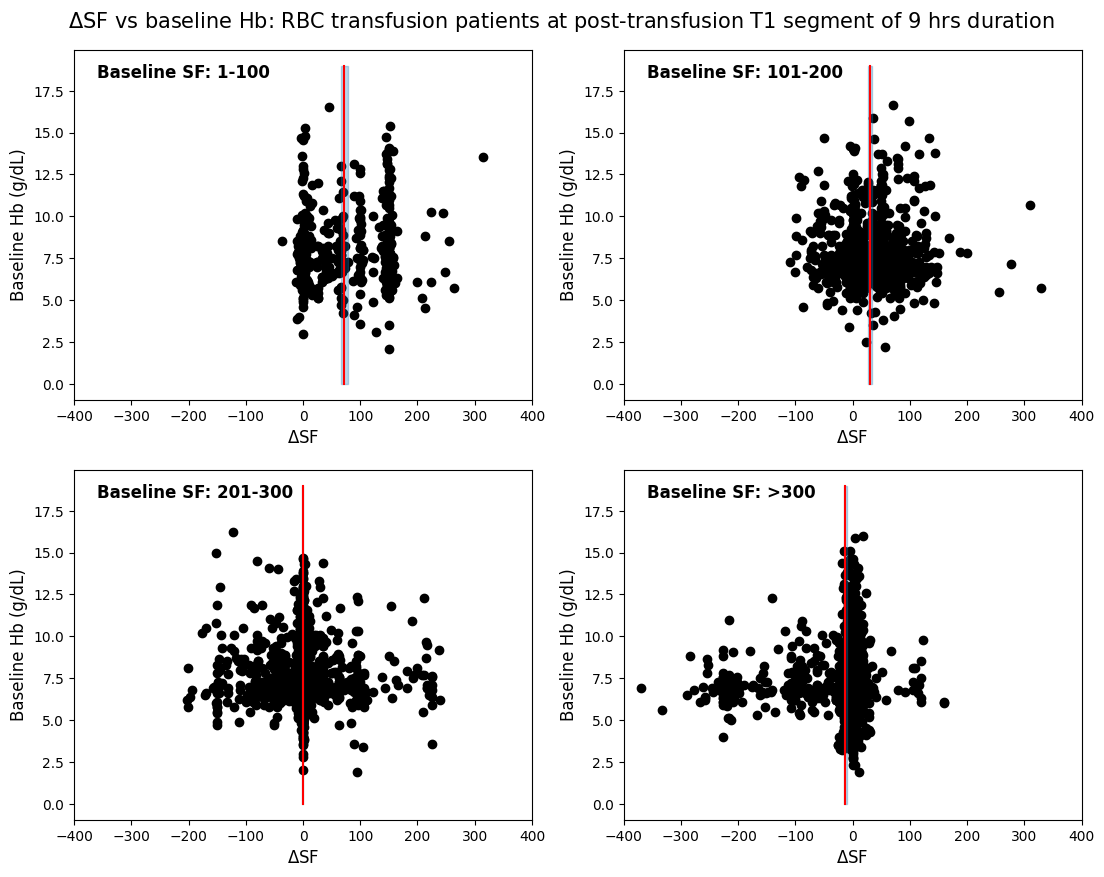

In [42]:
#in 2 x 2 subplots 
fig, axs = plt.subplots(2, 2, figsize =(13, 10))
line1 = np.arange(20)

axs[0,0].scatter(df_transf['del_SF_1a'], df_transf['Hb'],color='black')
#axs[0,0].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[0,0].set_xlabel('$\Delta$SF', fontsize=12)
axs[0,0].set_ylabel('Baseline Hb (g/dL)', fontsize=12)
axs[0,0].set_xlim([-400, 400])
# axs[0,0].set_ylim([np.min(mHb1a)-0.5, np.max(mHb1a)+0.5])
axs[0,0].plot(np.mean(dSF1a)*np.ones(20), line1,color='red')
axs[0,0].fill_betweenx(line1, CI1a[0], CI1a[1], color='C0', alpha=0.3)


#----------------------------------------------------------------------------
axs[0,1].scatter(df_transf['del_SF_1b'], df_transf['Hb'],color='black')
axs[0,1].set_xlabel('$\Delta$SF', fontsize=12)
axs[0,1].set_ylabel('Baseline Hb (g/dL)', fontsize=12)
axs[0,1].set_xlim([-400, 400])
# axs[0,1].set_ylim([np.min(mHb1b)-0.5, np.max(mHb1b)+0.5])
axs[0,1].plot(np.mean(dSF1b)*np.ones(20), line1,color='red')
axs[0,1].fill_betweenx(line1, CI1b[0], CI1b[1], color='C0', alpha=0.3)

##--------------------------------------------------------------------
axs[1,0].scatter(df_transf['del_SF_1c'], df_transf['Hb'],color='black')
#axs[1,0].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[1,0].set_xlabel('$\Delta$SF', fontsize=12)
axs[1,0].set_ylabel('Baseline Hb (g/dL)', fontsize=12)
axs[1,0].set_xlim([-400, 400])
# axs[1,0].set_ylim([np.min(mHb1c)-0.5, np.max(mHb1c)+0.5])
axs[1,0].plot(np.mean(dSF1c)*np.ones(20), line1,color='red')
axs[1,0].fill_betweenx(line1, CI1c[0], CI1c[1], color='C0', alpha=0.3)

##-----------------------------------------------------------------
axs[1,1].scatter(df_transf['del_SF_1d'], df_transf['Hb'],color='black')
#axs[1,1].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[1,1].set_xlabel('$\Delta$SF', fontsize=12)
axs[1,1].set_ylabel('Baseline Hb (g/dL)', fontsize=12)
axs[1,1].set_xlim([-400, 400])
# axs[1,1].set_ylim([np.min(mHb1d)-0.5, np.max(mHb1d)+0.5])
axs[1,1].plot(np.mean(dSF1d)*np.ones(20), line1,color='red')
#axs[1,1].plot(CI1d[0]*np.ones(20), line1,'g:',CI1d[1]*np.ones(20), line1,'g:')
axs[1,1].fill_betweenx(line1, CI1d[0], CI1d[1], color='C0', alpha=0.3)


# Show texts
axs[0,0].text(0.051, 0.96, 'Baseline SF: 1-100', horizontalalignment='left', verticalalignment='top', transform=axs[0,0].transAxes, fontsize=12, fontdict=dict(weight='bold'))
axs[0,1].text(0.051, 0.96, 'Baseline SF: 101-200', horizontalalignment='left', verticalalignment='top', transform=axs[0,1].transAxes, fontsize=12, fontdict=dict(weight='bold'))
axs[1,0].text(0.051, 0.96, 'Baseline SF: 201-300', horizontalalignment='left', verticalalignment='top', transform=axs[1,0].transAxes, fontsize=12, fontdict=dict(weight='bold'))
axs[1,1].text(0.051, 0.96, 'Baseline SF: >300', horizontalalignment='left', verticalalignment='top', transform=axs[1,1].transAxes, fontsize=12, fontdict=dict(weight='bold'))


#ax2.text(0.9, 0.5, 'End text', horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)


plt.suptitle('$\Delta$SF vs baseline Hb: RBC transfusion patients at post-transfusion T1 segment of 9 hrs duration', fontsize = 15, y=0.92)#\u03C4=9hrs
#plt.show()

# plt.savefig('DATA_RESULTS/delSFvsHb_RedCellsT_withCI_2by2_Grady.tif',format="tif", bbox_inches="tight", dpi=300)

**$\Delta$ SF vs baseline SF**

In [43]:
np.max(MSFbaseline_gp1)+0.5

100.5

In [44]:
df_transf.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'pat_id', 'csn', 'age_yrs',
       'transfusion_start', 'transfusion_end', 'blood_product_name',
       'hospital_admission_date_time', 'hospital_discharge_date_time', 'unit',
       'year', 'Arb', 'Tcount_7d', 'discharge_to', 'age', 'gender', 'race',
       'ethnicity', 'Hb', 'med_spo2_beforeT', 'med_Hb_beforeT',
       'med_SF_beforeT', 'med_PF_beforeT', 'MSPO2_afterT1', 'MSPO2_afterT2',
       'MSPO2_afterT3', 'MHB_afterT1', 'MHB_afterT2', 'MHB_afterT3',
       'MSF_afterT1', 'MSF_afterT2', 'MSF_afterT3', 'MPF_afterT1',
       'MPF_afterT2', 'MPF_afterT3', 'del_SPO2_1', 'del_SPO2_2', 'del_SPO2_3',
       'del_Hb_1', 'del_Hb_2', 'del_Hb_3', 'del_SF_1', 'del_SF_2', 'del_SF_3',
       'del_PF_1', 'del_PF_2', 'del_PF_3', 'MSF_beforeT', 'del_SF_1a',
       'del_SF_2a', 'del_SF_3a', 'del_SF_1b', 'del_SF_2b', 'del_SF_3b',
       'del_SF_1c', 'del_SF_2c', 'del_SF_3c', 'del_SF_1d', 'del_SF_2d',
       'del_SF_3d'],
      dtype='object')

In [45]:
# MSFbaseline_gp1.isnull().sum()
df_transf['del_SF_2a'].isnull().sum()

5924

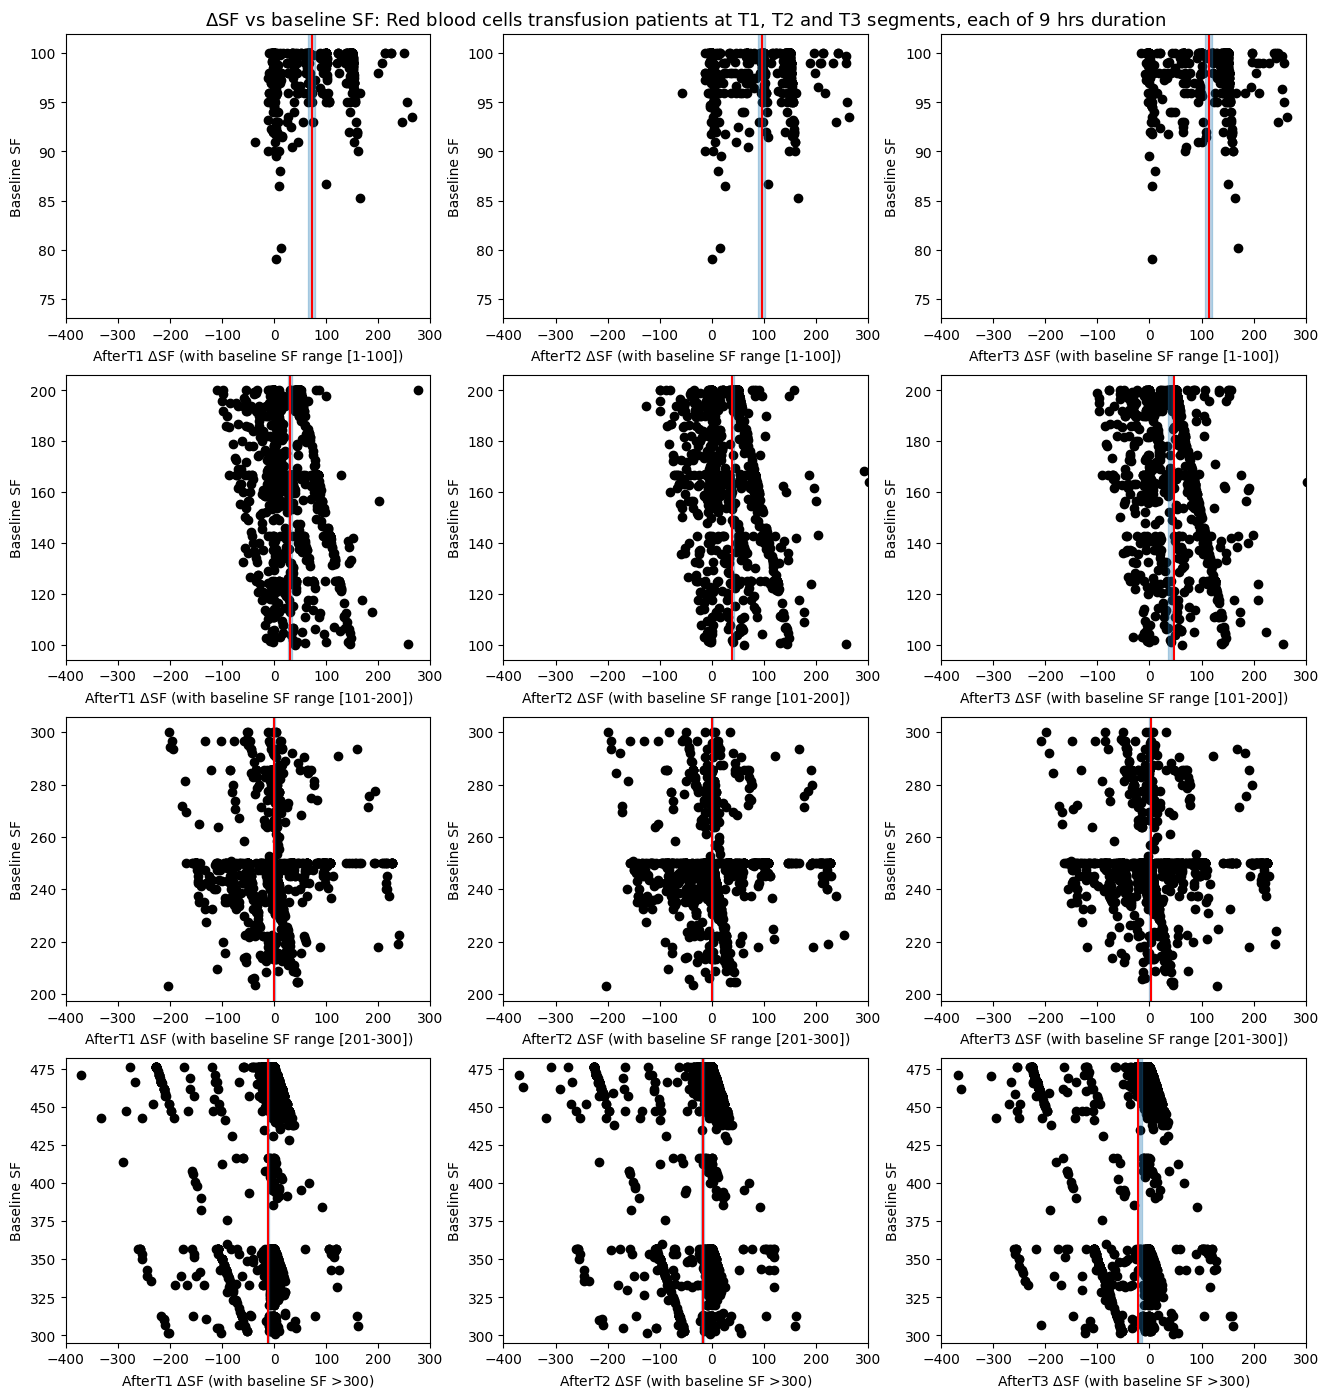

In [46]:
fig, axs = plt.subplots(4, 3, figsize =(16, 17))
line1 = np.arange(500)

axs[0,0].scatter(df_transf['del_SF_1a'], MSFbaseline_gp1,color='black')
#axs[0,0].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[0,0].set_xlabel('AfterT1 $\Delta$SF (with baseline SF range [1-100])')
axs[0,0].set_ylabel('Baseline SF')
axs[0,0].set_xlim([-400, 300])
axs[0,0].set_ylim([np.min(MSFbaseline_gp1)-6, np.max(MSFbaseline_gp1)+2])
axs[0,0].plot(np.mean(dSF1a)*np.ones(500), line1,color='red')
axs[0,0].fill_betweenx(line1, CI1a[0], CI1a[1], color='C0', alpha=0.3)


axs[0,1].scatter(df_transf['del_SF_2a'], MSFbaseline_gp1,color='black')
axs[0,1].set_title('$\Delta$SF vs baseline SF: Red blood cells transfusion patients at T1, T2 and T3 segments, each of 9 hrs duration', fontsize = 13)#\u03C4=9hrs
axs[0,1].set_xlabel('AfterT2 $\Delta$SF (with baseline SF range [1-100])')
axs[0,1].set_ylabel('Baseline SF')
axs[0,1].set_xlim([-400, 300])
axs[0,1].set_ylim([np.min(MSFbaseline_gp1)-6, np.max(MSFbaseline_gp1)+2])
axs[0,1].plot(np.mean(dSF2a)*np.ones(500), line1,color='red')
#axs[0,1].plot(CI2a[0]*np.ones(20), line1,'g:',CI2a[1]*np.ones(20), line1,'g:')
axs[0,1].fill_betweenx(line1, CI2a[0], CI2a[1], color='C0', alpha=0.3)


axs[0,2].scatter(df_transf['del_SF_3a'], MSFbaseline_gp1,color='black')
#axs[0,2].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[0,2].set_xlabel('AfterT3 $\Delta$SF (with baseline SF range [1-100])')
axs[0,2].set_ylabel('Baseline SF')
axs[0,2].set_xlim([-400, 300])
axs[0,2].set_ylim([np.min(MSFbaseline_gp1)-6, np.max(MSFbaseline_gp1)+2])
axs[0,2].plot(np.mean(dSF3a)*np.ones(500), line1,color='red')
#axs[0,2].plot(CI3a[0]*np.ones(20), line1,'g:',CI3a[1]*np.ones(20), line1,'g:')
axs[0,2].fill_betweenx(line1, CI3a[0], CI3a[1], color='C0', alpha=0.3)


#----------------------------------------------------------------------------
axs[1,0].scatter(df_transf['del_SF_1b'], MSFbaseline_gp2,color='black')
#axs[1,0].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[1,0].set_xlabel('AfterT1 $\Delta$SF (with baseline SF range [101-200])')
axs[1,0].set_ylabel('Baseline SF')
axs[1,0].set_xlim([-400, 300])
axs[1,0].set_ylim([np.min(MSFbaseline_gp2)-6, np.max(MSFbaseline_gp2)+6])
axs[1,0].plot(np.mean(dSF1b)*np.ones(500), line1,color='red')
axs[1,0].fill_betweenx(line1, CI1b[0], CI1b[1], color='C0', alpha=0.3)


axs[1,1].scatter(df_transf['del_SF_2b'], MSFbaseline_gp2,color='black')
#axs[1,1].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[1,1].set_xlabel('AfterT2 $\Delta$SF (with baseline SF range [101-200])')
axs[1,1].set_ylabel('Baseline SF')
axs[1,1].set_xlim([-400, 300])
axs[1,1].set_ylim([np.min(MSFbaseline_gp2)-6, np.max(MSFbaseline_gp2)+6])
axs[1,1].plot(np.mean(dSF2b)*np.ones(500), line1,color='red')
axs[1,1].fill_betweenx(line1, CI2b[0], CI2b[1], color='C0', alpha=0.3)


axs[1,2].scatter(df_transf['del_SF_3b'], MSFbaseline_gp2,color='black')
#axs[1,2].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[1,2].set_xlabel('AfterT3 $\Delta$SF (with baseline SF range [101-200])')
axs[1,2].set_ylabel('Baseline SF')
axs[1,2].set_xlim([-400, 300])
axs[1,2].set_ylim([np.min(MSFbaseline_gp2)-6, np.max(MSFbaseline_gp2)+6])
axs[1,2].plot(np.mean(dSF3b)*np.ones(500), line1,color='red')
axs[1,2].fill_betweenx(line1, CI3b[0], CI3b[1], color='C0', alpha=0.3)

##--------------------------------------------------------------------
axs[2,0].scatter(df_transf['del_SF_1c'], MSFbaseline_gp3,color='black')
#axs[2,0].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[2,0].set_xlabel('AfterT1 $\Delta$SF (with baseline SF range [201-300])')
axs[2,0].set_ylabel('Baseline SF')
axs[2,0].set_xlim([-400, 300])
axs[2,0].set_ylim([np.min(MSFbaseline_gp3)-6, np.max(MSFbaseline_gp3)+6])
axs[2,0].plot(np.mean(dSF1c)*np.ones(500), line1,color='red')
axs[2,0].fill_betweenx(line1, CI1c[0], CI1c[1], color='C0', alpha=0.3)


axs[2,1].scatter(df_transf['del_SF_2c'], MSFbaseline_gp3,color='black')
#axs[2,1].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[2,1].set_xlabel('AfterT2 $\Delta$SF (with baseline SF range [201-300])')
axs[2,1].set_ylabel('Baseline SF')
axs[2,1].set_xlim([-400, 300])
axs[2,1].set_ylim([np.min(MSFbaseline_gp3)-6, np.max(MSFbaseline_gp3)+6])
axs[2,1].plot(np.mean(dSF2c)*np.ones(500), line1,color='red')
axs[2,1].fill_betweenx(line1, CI2c[0], CI2c[1], color='C0', alpha=0.3)

axs[2,2].scatter(df_transf['del_SF_3c'], MSFbaseline_gp3,color='black')
#axs[2,2].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[2,2].set_xlabel('AfterT3 $\Delta$SF (with baseline SF range [201-300])')
axs[2,2].set_ylabel('Baseline SF')
axs[2,2].set_xlim([-400, 300])
axs[2,2].set_ylim([np.min(MSFbaseline_gp3)-6, np.max(MSFbaseline_gp3)+6])
axs[2,2].plot(np.mean(dSF3c)*np.ones(500), line1,color='red')
axs[2,2].fill_betweenx(line1, CI3c[0], CI3c[1], color='C0', alpha=0.3)

##-----------------------------------------------------------------
axs[3,0].scatter(df_transf['del_SF_1d'], MSFbaseline_gp4,color='black')
#axs[3,0].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[3,0].set_xlabel('AfterT1 $\Delta$SF (with baseline SF >300)')
axs[3,0].set_ylabel('Baseline SF')
axs[3,0].set_xlim([-400, 300])
axs[3,0].set_ylim([np.min(MSFbaseline_gp4)-6, np.max(MSFbaseline_gp4)+6])
axs[3,0].plot(np.mean(dSF1d)*np.ones(500), line1,color='red')
#axs[3,0].plot(CI1d[0]*np.ones(20), line1,'g:',CI1d[1]*np.ones(20), line1,'g:')
axs[3,0].fill_betweenx(line1, CI1d[0], CI1d[1], color='C0', alpha=0.3)

axs[3,1].scatter(df_transf['del_SF_2d'], MSFbaseline_gp4,color='black')
#axs[3,1].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[3,1].set_xlabel('AfterT2 $\Delta$SF (with baseline SF >300)')
axs[3,1].set_ylabel('Baseline SF')
axs[3,1].set_xlim([-400, 300])
axs[3,1].set_ylim([np.min(MSFbaseline_gp4)-6, np.max(MSFbaseline_gp4)+6])
axs[3,1].plot(np.mean(dSF2d)*np.ones(500), line1,color='red')
#axs[3,1].plot(CI2d[0]*np.ones(20), line1,'g:',CI2d[1]*np.ones(20), line1,'g:')
axs[3,1].fill_betweenx(line1, CI2d[0], CI2d[1], color='C0', alpha=0.3)

axs[3,2].scatter(df_transf['del_SF_3d'], MSFbaseline_gp4,color='black')
#axs[3,2].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[3,2].set_xlabel('AfterT3 $\Delta$SF (with baseline SF >300)')
axs[3,2].set_ylabel('Baseline SF')
axs[3,2].set_xlim([-400, 300])
axs[3,2].set_ylim([np.min(MSFbaseline_gp4)-6, np.max(MSFbaseline_gp4)+6])
axs[3,2].plot(np.mean(dSF3d)*np.ones(500), line1,color='red')
#axs[3,2].plot(CI3d[0]*np.ones(20), line1,'g:',CI3d[1]*np.ones(20), line1,'g:')
axs[3,2].fill_betweenx(line1, CI3d[0], CI3d[1], color='C0', alpha=0.3)

# plt.savefig('DATA_RESULTS/delSFvsBSF_RedCellsT_withCI_Grady.tif',format="tif", bbox_inches="tight", dpi=300)


In [47]:
np.shape(dSF1b), np.shape(MSFbaseline_gp2)

((901,), (6375,))

## Relation establishment: Baseline SF and RBC.T. efficacy (Delta SF)

In [48]:
from scipy.optimize import curve_fit

In [49]:
def func(x, a, b, c, d):
    return (a*(x)**3) + (b*(x)**2) + (c*(x)) + d

In [50]:
# xdata = [100, 200, 300, 400]
#xdata = np.append(np.append(np.append(100*np.ones(len(dSF1a)), 200*np.ones(len(dSF1b))), 300*np.ones(len(dSF1c))), 400*np.ones(len(dSF1d))) #Quantized baseline SF 


# BSFa = MSFbaseline_gp1.values #MSFbaseline_gp1[~np.isnan(MSFbaseline_gp1)]
# BSFb = MSFbaseline_gp2.values  #MSFbaseline_gp2[~np.isnan(MSFbaseline_gp2)]
# BSFc = MSFbaseline_gp3.values  #MSFbaseline_gp3[~np.isnan(MSFbaseline_gp3)]
# BSFd = MSFbaseline_gp4.values  #MSFbaseline_gp4[~np.isnan(MSFbaseline_gp4)]
# xdata = np.append(np.append(np.append(BSFa, BSFb), BSFc), BSFd) #consider original/actual baseline SF

In [51]:
xdata = pd.concat([MSFbaseline_gp1,MSFbaseline_gp2,MSFbaseline_gp3,MSFbaseline_gp4])

In [52]:
ydata = pd.concat([df_transf['del_SF_1a'],df_transf['del_SF_1b'],df_transf['del_SF_1c'],df_transf['del_SF_1d']])

In [53]:
# # ydata = [np.mean(dSF1a), np.mean(dSF1b), np.mean(dSF1c), np.mean(dSF1d)]
# # ydata = [np.array(dSF1a), np.array(dSF1b), np.array(dSF1c), np.array(dSF1d)]
# # ydata = np.append([dSF1a1, dSF1b1, dSF1c1], dSF1d1)
# # dSF1a1 = np.transpose(list(dSF1a))
# # dSF1b1 = np.transpose(list(dSF1b))
# # dSF1c1 = np.transpose(list(dSF1c))
# # dSF1d1 = np.transpose(list(dSF1d))

# dSF1a1 = df_transf['del_SF_1a'].values
# dSF1b1 = df_transf['del_SF_1b'].values
# dSF1c1 = df_transf['del_SF_1c'].values
# dSF1d1 = df_transf['del_SF_1d'].values
# ydata = np.append(np.append(np.append(dSF1a1, dSF1b1), dSF1c1), dSF1d1)


In [54]:
xy=pd.concat([xdata, ydata], axis=1)
xy

,0,1
0,None,None
1,None,None
2,None,None
3,None,None
4,None,None
...,...,...
6370,447.619048,-101.190476
6371,466.122449,-216.122449
6372,469.642857,-0.595238
6373,442.857143,14.285714


In [55]:
xy2 = xy[~xy.isnull().any(axis=1)]
xy2

,0,1
20,98.0,60.333333
40,94.0,146.0
58,100.0,150.0
101,100.0,-2.0
107,97.5,-4.5
...,...,...
6369,471.428571,4.761905
6370,447.619048,-101.190476
6371,466.122449,-216.122449
6372,469.642857,-0.595238


In [56]:
xy2 = xy2[xy2[0]>60]

In [57]:
xy2.sort_values(by=[0], inplace=True)

In [58]:
xy2[0].min(), xy2[0].max()

(79.0, 476.1904761904762)

In [59]:
xdata_new = (xy2.iloc[:,0])
ydata_new = (xy2.iloc[:,1])

In [60]:
popt, pcov = curve_fit(func, xdata_new, ydata_new)

In [61]:
popt

array([-7.89227435e-07,  1.78381205e-03, -1.00917044e+00,  1.51956213e+02])

In [62]:
pcov

array([[ 3.54041153e-13, -2.98806640e-10,  7.34913487e-08,
        -5.14710947e-06],
       [-2.98806640e-10,  2.54040193e-07, -6.31751918e-05,
         4.49605934e-03],
       [ 7.34913487e-08, -6.31751918e-05,  1.59930229e-02,
        -1.16977282e+00],
       [-5.14710947e-06,  4.49605934e-03, -1.16977282e+00,
         8.96635098e+01]])

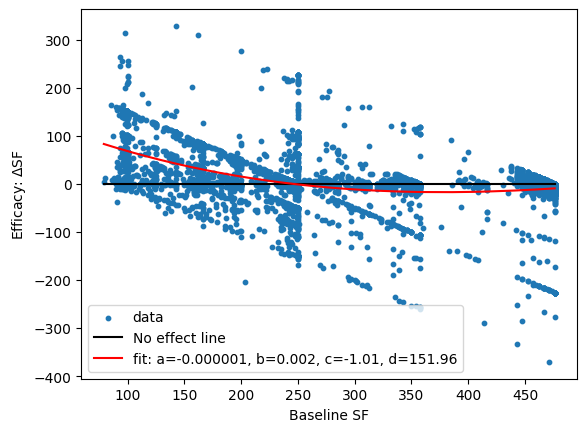

In [63]:
plt.scatter(xdata_new, ydata_new, label='data', s=10)
ll = np.arange(xdata_new.min(), xdata_new.max())
plt.plot(ll, np.zeros(len(ll)), color='k', label='No effect line')
plt.plot(xdata_new, func(xdata_new, *popt), 'r-',label='fit: a=%5.6f, b=%5.3f, c=%5.2f, d=%5.2f' % tuple(popt))
plt.xlabel('Baseline SF')
plt.ylabel('Efficacy: $\Delta$SF')


plt.legend()
# plt.xlim([0,500])
# plt.ylim([-500,500])
plt.show()

Text(0, 0.5, 'Efficacy: $\\Delta$SF')

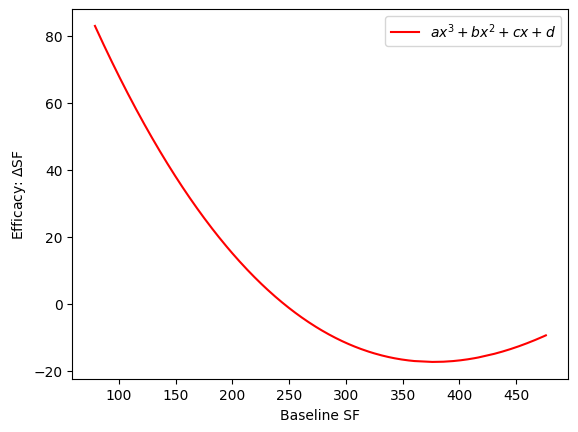

In [64]:
plt.plot(xdata_new, func(xdata_new, *popt), 'r-',label='$ax^3 + bx^2 + cx + d$' )
plt.legend()
plt.xlabel('Baseline SF')
plt.ylabel('Efficacy: $\Delta$SF')

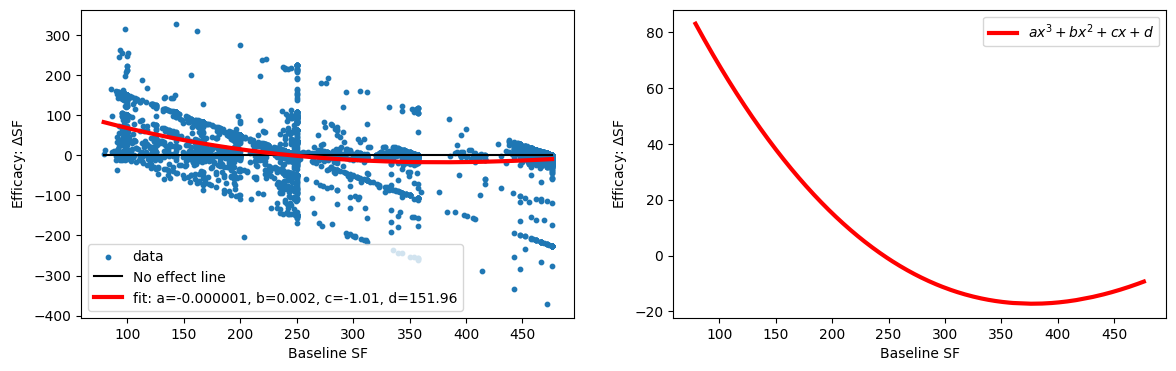

In [65]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,4))
ax1.scatter(xdata_new, ydata_new, label='data', s=10)
ll = np.arange(xdata_new.min(), xdata_new.max())
ax1.plot(ll, np.zeros(len(ll)), color='k', label='No effect line')
ax1.plot(xdata_new, func(xdata_new, *popt), 'r-',label='fit: a=%5.6f, b=%5.3f, c=%5.2f, d=%5.2f' % tuple(popt), lw=3)
ax1.set_xlabel('Baseline SF')
ax1.set_ylabel('Efficacy: $\Delta$SF')
ax1.legend()

ax2.plot(xdata_new, func(xdata_new, *popt), 'r-',label='$ax^3 + bx^2 + cx + d$' , lw=3)
ax2.legend()
ax2.set_xlabel('Baseline SF')
ax2.set_ylabel('Efficacy: $\Delta$SF')

# plt.xlim([0,500])
# plt.ylim([-500,500])
plt.show()

In [66]:
import sklearn
print('R2 square : ',sklearn.metrics.r2_score(ydata_new, func(xdata_new, *popt)))

R2 square :  0.20344791585151611


/home/tchoud7/.local/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: divide by zero encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/home/tchoud7/.local/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


R2 square :  0.1789921726804492


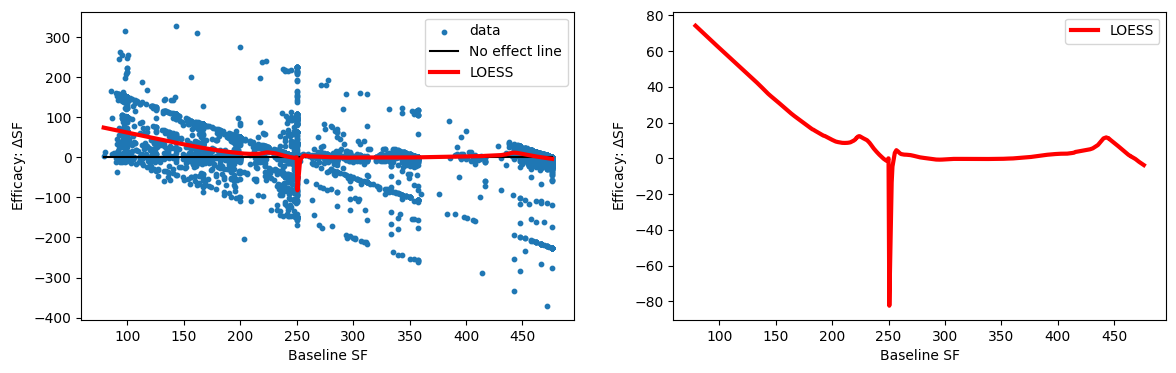

In [69]:
from statsmodels.nonparametric.smoothers_lowess import lowess

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,4))
ax1.scatter(xdata_new, ydata_new, label='data', s=10)
ll = np.arange(xdata_new.min(), xdata_new.max())
ax1.plot(ll, np.zeros(len(ll)), color='k', label='No effect line')


filtered = lowess(ydata_new, xdata_new, frac=0.17) #frac=0.15
ax1.plot(filtered[:, 0], filtered[:, 1], 'r-',label='LOESS', lw=3)
ax1.set_xlabel('Baseline SF')
ax1.set_ylabel('Efficacy: $\Delta$SF')
ax1.legend()



ax2.plot(filtered[:, 0], filtered[:, 1], 'r-',label='LOESS', lw=3)
ax2.legend()
ax2.set_xlabel('Baseline SF')
ax2.set_ylabel('Efficacy: $\Delta$SF')

print('R2 square : ', sklearn.metrics.r2_score(ydata_new, filtered[:, 1]))
# # plt.xlim([0,500])
# # plt.ylim([-500,500])
plt.show()

In [66]:
z = np.polyfit(list(xdata_new), list(ydata_new), 3)
p = np.poly1d(z)
z

array([-7.89229051e-07,  1.78381341e-03, -1.00917078e+00,  1.51956236e+02])

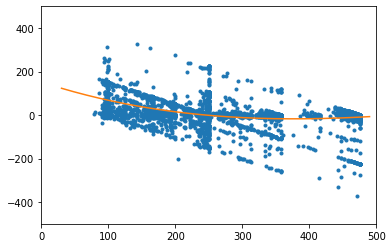

In [67]:
xp = np.linspace(30, 490, 200)
plt.plot(xdata_new, ydata_new, '.', xp, p(xp), '-')
plt.xlim([0,500])
plt.ylim([-500,500])
plt.show()

In [68]:
#define function to calculate adjusted r-squared
def adjR(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results['r_squared'] = 1- (((1-(ssreg/sstot))*(len(y)-1))/(len(y)-degree-1))
    return results

In [69]:
adjR(list(xdata_new), list(ydata_new), 1)

{'r_squared': 0.11869839931731896}

**Modification/Postprocessing of ydata (i.e. $\Delta$SF)** 

For same baseline SFs, find mean of $\Delta$SFs. xdata: baseline SF, ydata: $\Delta$SF

In [70]:
xdata

0             None
1             None
2             None
3             None
4             None
           ...    
6370    447.619048
6371    466.122449
6372    469.642857
6373    442.857143
6374          None
Length: 25500, dtype: object

In [71]:
x=[1, 5, 3, 9, 5, 3, 2, 5]
y=[100, 120, 140, 100, 400, 200, 250, 300]

In [72]:
data = {'x1':xdata_new, 'y1':ydata_new}

In [73]:
df1=pd.DataFrame(data)
df1

,x1,y1
2208,79.0,3.0
5379,80.15,13.1
2505,85.25,164.75
5776,86.5,8.5
3052,86.666667,99.333333
...,...,...
684,476.190476,0.0
216,476.190476,0.0
2688,476.190476,-19.047619
2666,476.190476,0.0


In [74]:
df2=df1.sort_values(by=['x1']).reset_index(drop=True)

In [75]:
df2

,x1,y1
0,79.0,3.0
1,80.15,13.1
2,85.25,164.75
3,86.5,8.5
4,86.666667,99.333333
...,...,...
6370,476.190476,-9.52381
6371,476.190476,-19.047619
6372,476.190476,0.0
6373,476.190476,0.0


In [76]:
xdata_n = np.unique(df2['x1'])
xdata_n

array([79.0, 80.15, 85.25, 86.5, 86.66666666666667, 88.0, 89.5, 90.0,
       90.5, 91.0, 91.47222222222224, 91.625, 91.75, 92.0,
       92.28333333333332, 92.375, 92.5, 93.0, 93.25, 93.5, 94.0, 94.5,
       94.75, 95.0, 95.16666666666666, 95.25, 95.375, 95.625, 95.75,
       95.91836734693878, 95.9398148148148, 96.0, 96.16666666666666,
       96.375, 96.5, 96.58333333333334, 96.625, 96.66666666666669, 96.75,
       96.96969696969695, 97.0, 97.125, 97.1943887775551, 97.25, 97.375,
       97.5, 97.66666666666669, 97.75, 97.88888888888889,
       97.89473684210526, 97.89473684210527, 97.95918367346938, 98.0,
       98.16666666666666, 98.42857142857144, 98.44155844155844,
       98.48484848484848, 98.5, 98.625, 98.75, 98.83333333333334,
       98.989898989899, 99.0, 99.08333333333334, 99.1, 99.125,
       99.16666666666666, 99.21739130434784, 99.25, 99.33333333333331,
       99.375, 99.41666666666666, 99.48979591836736, 99.5,
       99.55555555555556, 99.66666666666669, 99.75, 99.8, 99.822

In [77]:
ydata_n = []
for i in xdata_n:
    ids=np.where(df2['x1']==i)
    # print(ids[0])
    mn = np.mean(df2['y1'].iloc[ids[0]])
    ydata_n = np.append(ydata_n, mn)

## TE=a(1/BSF)+b

In [78]:
z = np.polyfit(list(1/xdata_n), ydata_n, 3)
p = np.poly1d(z)
z

array([-3.94387967e+08,  7.52604154e+06, -3.24019398e+04,  2.56974262e+01])

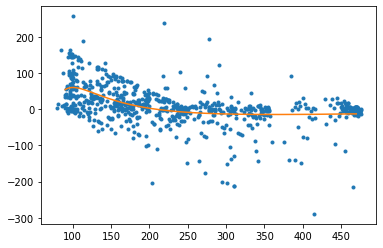

In [79]:
xp = np.linspace(90, 470, 5000)
plt.plot(xdata_n, ydata_n, '.', xp, p(1/xp), '-')

plt.show()

In [80]:
adjR(list(1/xdata_n), ydata_n, 3)

{'r_squared': 0.2415537732472085}

## Delta PF vs baseline Hb

In [81]:

# df_transf['del_PF_1']=df_transf['MPF_afterT1'] - df_transf['MPF_beforeT']
# df_transf['del_PF_2']=df_transf['MPF_afterT2'] - df_transf['MPF_beforeT']
# df_transf['del_PF_3']=df_transf['MPF_afterT3'] - df_transf['MPF_beforeT']

Text(0, 0.5, 'Baseline Hb (g/dL)')

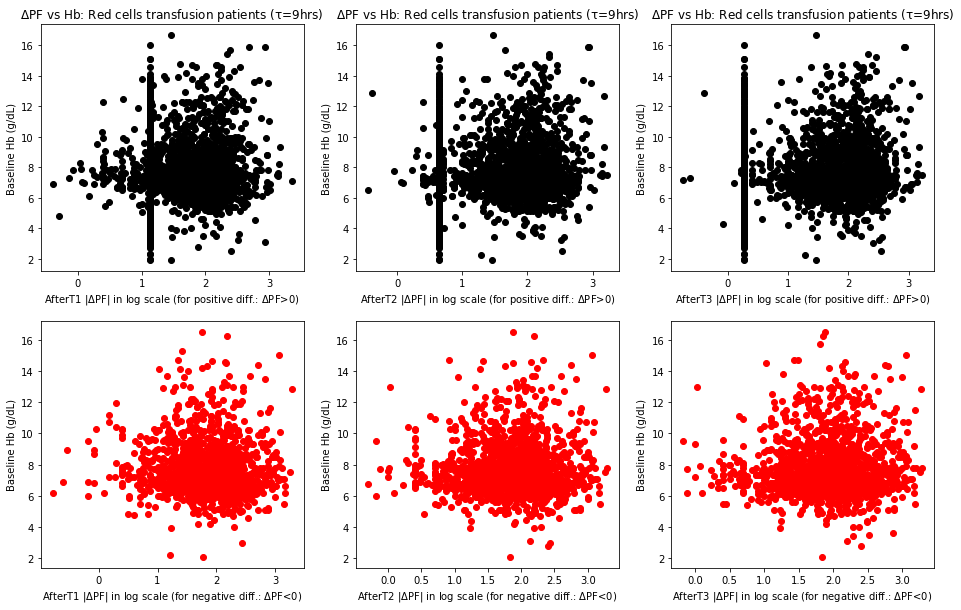

In [82]:
fig, axs = plt.subplots(2, 3, figsize =(16, 10))

delPF1=df_transf['del_PF_1'][df_transf['del_PF_1']>0]
Hb1 = df_transf['Hb'][df_transf['del_PF_1']>0]
axs[0,0].scatter(np.log10(delPF1), Hb1, color='black')
axs[0,0].set_title('$\Delta$PF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[0,0].set_xlabel('AfterT1 |$\Delta$PF| in log scale (for positive diff.: $\Delta$PF>0)')
axs[0,0].set_ylabel('Baseline Hb (g/dL)')
#axs[0].set_xscale('symlog')#loglog(basex=10)

delPF2=df_transf['del_PF_2'][df_transf['del_PF_2']>0]
Hb2 = df_transf['Hb'][df_transf['del_PF_2']>0]
axs[0,1].scatter(np.log10(delPF2), Hb2,color='black')
axs[0,1].set_title('$\Delta$PF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[0,1].set_xlabel('AfterT2 |$\Delta$PF| in log scale (for positive diff.: $\Delta$PF>0)')
axs[0,1].set_ylabel('Baseline Hb (g/dL)')
#axs[1].set_xscale('symlog')#loglog(basex=10)

delPF3=df_transf['del_PF_3'][df_transf['del_PF_3']>0]
Hb3 = df_transf['Hb'][df_transf['del_PF_3']>0]
axs[0,2].scatter(np.log10(delPF3), Hb3,color='black')
axs[0,2].set_title('$\Delta$PF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[0,2].set_xlabel('AfterT3 |$\Delta$PF| in log scale (for positive diff.: $\Delta$PF>0)')
axs[0,2].set_ylabel('Baseline Hb (g/dL)')
#axs[2].set_xscale('symlog')#loglog(basex=10)

#-------------------
delPF1n=np.abs(df_transf['del_PF_1'][df_transf['del_PF_1']<0])
Hb1n = df_transf['Hb'][df_transf['del_PF_1']<0]
axs[1,0].scatter(np.log10(delPF1n), Hb1n, color='red')
#axs[1,0].set_title('$\Delta$PF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[1,0].set_xlabel('AfterT1 |$\Delta$PF| in log scale (for negative diff.: $\Delta$PF<0)')
axs[1,0].set_ylabel('Baseline Hb (g/dL)')
#axs[0].set_xscale('symlog')#loglog(basex=10)

delPF2n=np.abs(df_transf['del_PF_2'][df_transf['del_PF_2']<0])
Hb2n = df_transf['Hb'][df_transf['del_PF_2']<0]
axs[1,1].scatter(np.log10(delPF2n), Hb2n,color='red')
#axs[1,1].set_title('$\Delta$PF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[1,1].set_xlabel('AfterT2 |$\Delta$PF| in log scale (for negative diff.: $\Delta$PF<0)')
axs[1,1].set_ylabel('Baseline Hb (g/dL)')
#axs[1].set_xscale('symlog')#loglog(basex=10)

delPF3n=np.abs(df_transf['del_PF_3'][df_transf['del_PF_3']<0])
Hb3n = df_transf['Hb'][df_transf['del_PF_3']<0]
axs[1,2].scatter(np.log10(delPF3n), Hb3n,color='red')
#axs[1,2].set_title('$\Delta$PF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[1,2].set_xlabel('AfterT3 |$\Delta$PF| in log scale (for negative diff.: $\Delta$PF<0)')
axs[1,2].set_ylabel('Baseline Hb (g/dL)')
#axs[2].set_xscale('symlog')#loglog(basex=10)

# plt.savefig('DATA_RESULTS/delPFvsHb_RedCellsT_6_23_22_delPF_log_Grady.png')

## Find Demographics

In [83]:
df_transf.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'pat_id', 'csn', 'age_yrs',
       'transfusion_start', 'transfusion_end', 'blood_product_name',
       'hospital_admission_date_time', 'hospital_discharge_date_time', 'unit',
       'year', 'Arb', 'Tcount_7d', 'discharge_to', 'age', 'gender', 'race',
       'ethnicity', 'Hb', 'med_spo2_beforeT', 'med_Hb_beforeT',
       'med_SF_beforeT', 'med_PF_beforeT', 'MSPO2_afterT1', 'MSPO2_afterT2',
       'MSPO2_afterT3', 'MHB_afterT1', 'MHB_afterT2', 'MHB_afterT3',
       'MSF_afterT1', 'MSF_afterT2', 'MSF_afterT3', 'MPF_afterT1',
       'MPF_afterT2', 'MPF_afterT3', 'del_SPO2_1', 'del_SPO2_2', 'del_SPO2_3',
       'del_Hb_1', 'del_Hb_2', 'del_Hb_3', 'del_SF_1', 'del_SF_2', 'del_SF_3',
       'del_PF_1', 'del_PF_2', 'del_PF_3', 'MSF_beforeT', 'del_SF_1a',
       'del_SF_2a', 'del_SF_3a', 'del_SF_1b', 'del_SF_2b', 'del_SF_3b',
       'del_SF_1c', 'del_SF_2c', 'del_SF_3c', 'del_SF_1d', 'del_SF_2d',
       'del_SF_3d'],
      dtype='object')

In [84]:
Total_T_instances = len(df_transf)
Total_T_instances

6375

In [85]:
Total_pat_csn = len(np.unique(df_transf['csn']))
Total_pat_csn

3757

In [86]:
csns = df_transf['csn']

In [87]:
df_transf.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'pat_id', 'csn', 'age_yrs',
       'transfusion_start', 'transfusion_end', 'blood_product_name',
       'hospital_admission_date_time', 'hospital_discharge_date_time', 'unit',
       'year', 'Arb', 'Tcount_7d', 'discharge_to', 'age', 'gender', 'race',
       'ethnicity', 'Hb', 'med_spo2_beforeT', 'med_Hb_beforeT',
       'med_SF_beforeT', 'med_PF_beforeT', 'MSPO2_afterT1', 'MSPO2_afterT2',
       'MSPO2_afterT3', 'MHB_afterT1', 'MHB_afterT2', 'MHB_afterT3',
       'MSF_afterT1', 'MSF_afterT2', 'MSF_afterT3', 'MPF_afterT1',
       'MPF_afterT2', 'MPF_afterT3', 'del_SPO2_1', 'del_SPO2_2', 'del_SPO2_3',
       'del_Hb_1', 'del_Hb_2', 'del_Hb_3', 'del_SF_1', 'del_SF_2', 'del_SF_3',
       'del_PF_1', 'del_PF_2', 'del_PF_3', 'MSF_beforeT', 'del_SF_1a',
       'del_SF_2a', 'del_SF_3a', 'del_SF_1b', 'del_SF_2b', 'del_SF_3b',
       'del_SF_1c', 'del_SF_2c', 'del_SF_3c', 'del_SF_1d', 'del_SF_2d',
       'del_SF_3d'],
      dtype='object')

In [88]:
len(csns.unique())

3757

In [89]:
### TABLEONE

In [90]:
df_transf.shape

(6375, 61)

## Table One of Demographic and Important Features

In [111]:
medianAllSuperTable3new = pd.read_csv("../tc_Transfusion_Phenotyping/dfGrady_rbcT_ReducedFeatures_OurlierRejected_NoImputed_v1g.csv")

In [112]:
medianAllSuperTable3new.shape, len(medianAllSuperTable3new.csn.unique()), df_transf.shape, len(df_transf.csn.unique())

((6382, 94), 3706, (6375, 61), 3757)

In [91]:
df_transf.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'pat_id', 'csn', 'age_yrs',
       'transfusion_start', 'transfusion_end', 'blood_product_name',
       'hospital_admission_date_time', 'hospital_discharge_date_time', 'unit',
       'year', 'Arb', 'Tcount_7d', 'discharge_to', 'age', 'gender', 'race',
       'ethnicity', 'Hb', 'med_spo2_beforeT', 'med_Hb_beforeT',
       'med_SF_beforeT', 'med_PF_beforeT', 'MSPO2_afterT1', 'MSPO2_afterT2',
       'MSPO2_afterT3', 'MHB_afterT1', 'MHB_afterT2', 'MHB_afterT3',
       'MSF_afterT1', 'MSF_afterT2', 'MSF_afterT3', 'MPF_afterT1',
       'MPF_afterT2', 'MPF_afterT3', 'del_SPO2_1', 'del_SPO2_2', 'del_SPO2_3',
       'del_Hb_1', 'del_Hb_2', 'del_Hb_3', 'del_SF_1', 'del_SF_2', 'del_SF_3',
       'del_PF_1', 'del_PF_2', 'del_PF_3', 'MSF_beforeT', 'del_SF_1a',
       'del_SF_2a', 'del_SF_3a', 'del_SF_1b', 'del_SF_2b', 'del_SF_3b',
       'del_SF_1c', 'del_SF_2c', 'del_SF_3c', 'del_SF_1d', 'del_SF_2d',
       'del_SF_3d'],
      dtype='object')

In [4]:
from multiprocessing import Pool
import time
import warnings
warnings.filterwarnings('ignore')
start = time.time()
def f1(i):
    AllSuperTable = pd.DataFrame([])
    try:
        transT = pd.to_datetime(df_transf.iloc[i]['transfusion_start'])
        year = df_transf.iloc[i]['year']   #pd.to_datetime(IntersectionBeforeT_RBC.iloc[i]['FileStart']).year #dt.year
        csn = df_transf.iloc[i]['csn']
        
        ## Assessing super table
        pkl_path = '/labs/kamaleswaranlab/MODS/Encounter_Pickles/gr/'+str(year)+'/'+str(csn)+'.pickle'
        with open(pkl_path, 'rb') as pf:
            patient_enc_dict = pickle.load(pf)
        super_table = patient_enc_dict['super_table']
        super_table['Time']=super_table.index
        
        super_table0 = super_table.pop('Time')
        super_table.insert(0, 'Time', super_table0) #First column is "Time" now [moved from last to first column]
        
                       
        #*---------- Preprocessings -------------*#
        
        # super_table.drop(['c_diff','norepinephrine_dose_unit'], axis=1, inplace=True)
        super_table.index=np.arange(len(super_table))
        super_table.replace([np.inf, -np.inf], np.nan, inplace=True)
        super_table.dropna(subset=super_table.iloc[:,1:].columns, how="all", inplace=True)
        
        
                
        if csn==1021917481: super_table['pf_sp'] = super_table['pf_sa'].values
        
        #Get these measures for beforeT
        a = np.array((transT-super_table['Time']).dt.days)
        
        
        #Find the sign change to identify transfusion time
        id1=np.where(a>=0)
        beforeTid = id1[0][-1] #Closest and before the transfusion starts
        #beforeT_Inds = np.arange(beforeTid-23, beforeTid)
        
        #Inter-sample interval is 1 hr in super_table
        if beforeTid >= 23: 
            super_table_BeforeT = super_table.iloc[beforeTid-23: beforeTid+1]
            super_table_BeforeT['SOFA_admission_hourly_total'] = patient_enc_dict['sofa_scores']['hourly_total'][0]
            super_table_BeforeT['SOFA_max_hourly_total'] = patient_enc_dict['sofa_scores']['hourly_total'][beforeTid-23: beforeTid+1].max()
            #One hot encoding for some categorical features
            indx = list(super_table_BeforeT.columns).index('temperature')
            super_table_BeforeT_Dummies = pd.get_dummies(super_table_BeforeT.iloc[:,indx:],drop_first=True)
            super_table_BeforeT_New = pd.concat([super_table_BeforeT.iloc[:,:indx], super_table_BeforeT_Dummies], axis=1)
            
        elif beforeTid > 2 and beforeTid < 23:    
            super_table_BeforeT = super_table.iloc[: beforeTid+1]
            super_table_BeforeT['SOFA_admission_hourly_total'] = patient_enc_dict['sofa_scores']['hourly_total'][0]
            super_table_BeforeT['SOFA_max_hourly_total'] = patient_enc_dict['sofa_scores']['hourly_total'][: beforeTid+1].max()
            #One hot encoding for some categorical features
            indx = list(super_table_BeforeT.columns).index('temperature')
            super_table_BeforeT_Dummies = pd.get_dummies(super_table_BeforeT.iloc[:,indx:],drop_first=True)
            super_table_BeforeT_New = pd.concat([super_table_BeforeT.iloc[:,:indx], super_table_BeforeT_Dummies], axis=1)
        else:
            super_table_BeforeT_New = []
            #print('Removed')
        
        
        
        #Discarding patient with no data present beforeT 3hrs window
        #Concatenation of features with broadcasted patient info
        Ls = len(super_table_BeforeT_New)
        if Ls>0:
            
            ###median calculation
            # initials = pd.DataFrame(super_table_BeforeT_New.loc[:'ethnicity']).T
            a1 = pd.DataFrame(super_table_BeforeT_New.loc[:,'temperature':].median(axis = 0)).T
            # a1 = pd.concat([initials, a], axis=1)
            
            z = pd.DataFrame(df_transf.iloc[i]).T
            z['discharge_to'] = patient_enc_dict['static_features']['discharge_to']
            z['age'] = patient_enc_dict['static_features']['age']
            z['gender'] = patient_enc_dict['static_features']['gender']
            z['race'] = patient_enc_dict['static_features']['race']
            z['ethnicity'] = patient_enc_dict['static_features']['ethnicity']
            
            z.reset_index(drop=True, inplace=True)
            a1.reset_index(drop=True, inplace=True)
            super_table_BeforeT_New1 = pd.concat([z, a1], axis=1)
            AllSuperTable = AllSuperTable.append(super_table_BeforeT_New1)
    except FileNotFoundError:
        print('FileNotFoundError:',i)
        pass
    return AllSuperTable

p = Pool(12)
results = p.map(f1, range(0,df_transf.shape[0]))   
p.close()
p.join()        
AllSuperTable_1 = pd.concat(results, ignore_index=True)
end = time.time()
print('Completed in: %s sec'%(end - start))

Completed in: 57.723954916000366 sec


In [6]:
AllSuperTable_1.shape

(6375, 162)

In [155]:
AllSuperTable_1.columns[:30]

Index(['Unnamed: 0.1', 'Unnamed: 0', 'pat_id', 'csn', 'age_yrs',
       'transfusion_start', 'transfusion_end', 'blood_product_name',
       'hospital_admission_date_time', 'hospital_discharge_date_time', 'unit',
       'year', 'Arb', 'Tcount_7d', 'discharge_to', 'age', 'gender', 'race',
       'ethnicity', 'Hb', 'med_spo2_beforeT', 'med_Hb_beforeT',
       'med_SF_beforeT', 'med_PF_beforeT', 'MSPO2_afterT1', 'MSPO2_afterT2',
       'MSPO2_afterT3', 'MHB_afterT1', 'MHB_afterT2', 'MHB_afterT3'],
      dtype='object')

In [7]:
AllSuperTable_2 = AllSuperTable_1[~AllSuperTable_1['med_SF_beforeT'].isnull()]

bsf = AllSuperTable_2['med_SF_beforeT']
cond1 =  bsf>0 
cond2 = bsf<=100
cond12 = cond1 & cond2
C1 = pd.Series(cond12, dtype=int)*1

cond1 =  bsf>100 
cond2 = bsf<=200
cond12 = cond1 & cond2
C2 = pd.Series(cond12, dtype=int)*2

cond1 =  bsf>200 
cond2 = bsf<=300
cond12 = cond1 & cond2
C3 = pd.Series(cond12, dtype=int)*3

cond1 =  bsf>300 
cond12 = cond1
C4 = pd.Series(cond12, dtype=int)*4

AllSuperTable_2['BSF_group'] = C1 + C2 + C3 + C4

In [8]:
AllSuperTable_2.race.unique(), AllSuperTable_2.ethnicity.unique()

(array(['Black or African American', 'White or Caucasian', 'Hispanic',
        'Asian', 'Other', 'Unknown',
        'Native Hawaiian and Other Pacific Islander', 'Multi-Racial',
        'American Indian and Alaskan Native'], dtype=object),
 array(['Non-Hispanic', 'Hispanic', 'Unknown'], dtype=object))

In [9]:
AllSuperTable_2.reset_index(drop=True, inplace=True)
race_others_i = AllSuperTable_2[~AllSuperTable_2.race.isin(['Black or African American', 'White or Caucasian'])].loc[:,'race'].index
AllSuperTable_2['race'].iloc[race_others_i] = 'Others'
AllSuperTable_2.race.unique()

array(['Black or African American', 'White or Caucasian', 'Others'],
      dtype=object)

In [10]:
AllSuperTable_2.reset_index(drop=True, inplace=True)
eth_others_i = AllSuperTable_2[~AllSuperTable_2.ethnicity.isin(['Non-Hispanic', 'Hispanic'])].loc[:,'ethnicity'].index
AllSuperTable_2['ethnicity'].iloc[eth_others_i] = 'Others'
AllSuperTable_2.ethnicity.unique()

array(['Non-Hispanic', 'Hispanic', 'Others'], dtype=object)

In [11]:
print('Unique CSNs:',len(AllSuperTable_2.csn.unique()), len(AllSuperTable_2[AllSuperTable_2.BSF_group==1].csn.unique()),
      len(AllSuperTable_2[AllSuperTable_2.BSF_group==2].csn.unique()),len(AllSuperTable_2[AllSuperTable_2.BSF_group==3].csn.unique()),
     len(AllSuperTable_2[AllSuperTable_2.BSF_group==4].csn.unique())) 

print('Unique Patients:',len(AllSuperTable_2.pat_id.unique()), len(AllSuperTable_2[AllSuperTable_2.BSF_group==1].pat_id.unique()),
      len(AllSuperTable_2[AllSuperTable_2.BSF_group==2].pat_id.unique()),len(AllSuperTable_2[AllSuperTable_2.BSF_group==3].pat_id.unique()),
      len(AllSuperTable_2[AllSuperTable_2.BSF_group==4].pat_id.unique()))

Unique CSNs: 3757 434 711 1836 1621
Unique Patients: 3552 433 703 1785 1553


In [219]:
cols = ['age', 'gender','race','ethnicity', 'daily_weight_kg', 'height_cm',#'Tcount_7d',
        'hematocrit', 'hemoglobin',
        #'best_map','pulse',
        'blood_urea_nitrogen_(bun)','creatinine','platelets',# 'white_blood_cell_count',
        'bilirubin_total', #'fibrinogen', 
        'inr',#'partial_prothrombin_time_(ptt)',#'b-type_natriuretic_peptide_(bnp)',
        'fio2','pf_sp','pf_pa',
        'gcs_total_score','SOFA_max_hourly_total']


from tableone import TableOne
groupby = ['BSF_group']
cols = cols
categorical=['gender','race','ethnicity']

##### limit the binary variable to a single row
# limit = {"hispanic": 1}
labels={'BSF_group': 'Baseline SF groups'}
data = AllSuperTable_2
data_unimputed = TableOne(data, missing=False, columns=cols, categorical=categorical, groupby=groupby,rename=labels,label_suffix=True, pval=True, htest_name=False) #, nonnormal=nonnormal) #, limit=limit) 
#, columns=columns, categorical=categorical, groupby=groupby, nonnormal=nonnormal, rename=labels, pval=False)
data_unimputed

# data_unimputed.to_latex('tableoneGrady_unimputed_ver3.tex')
# data_unimputed.to_csv('tableoneGrady_unimputed_ver3.csv')

Grouped by Baseline SF groups                                                                     
                                                                                     Overall              1              2              3               4 P-Value
n                                                                                       6375            451            901           2852            2171        
age, mean (SD)                                                                   53.7 (17.5)    54.2 (17.3)    54.7 (17.2)    53.5 (17.3)     53.3 (17.9)   0.210
gender, n (%)                        Female                                      2634 (41.3)     168 (37.3)     343 (38.1)    1170 (41.0)      953 (43.9)   0.005
                                     Male                                        3741 (58.7)     283 (62.7)     558 (61.9)    1682 (59.0)     1218 (56.1)        
race, n (%)                          Black or African American                   4751 (74.5)     342 (75.8)     591 (65.6)    2128 (74.6)     1690 (77.8)  <0.001
                                     Others                                        498 (7.8)       29 (6.4)       87 (9.7)      223 (7.8)       159 (7.3)        
                                     White or Caucasian                          1126 (17.7)      80 (17.7)     223 (24.8)     501 (17.6)      322 (14.8)        
ethnicity, n (%)                     Hispanic                                      279 (4.4)       13 (2.9)       42 (4.7)      132 (4.6)        92 (4.2)   0.758
                                     Non-Hispanic                                6043 (94.8)     435 (96.5)     851 (94.5)    2697 (94.6)     2060 (94.9)        
                                     Others                                         53 (0.8)        3 (0.7)        8 (0.9)       23 (0.8)        19 (0.9)        
daily_weight_kg, mean (SD)                                                       81.0 (25.8)    80.4 (22.8)    85.3 (26.0)    82.0 (27.7)     78.1 (23.3)  <0.001
height_cm, mean (SD)                                                            171.7 (11.5)   171.6 (11.0)   172.2 (13.1)   171.7 (11.2)    171.4 (11.2)   0.412
hematocrit, mean (SD)                                                             23.9 (5.3)     26.9 (7.5)     25.1 (6.0)     23.5 (4.4)      23.3 (5.3)  <0.001
hemoglobin, mean (SD)                                                              8.0 (1.8)      8.9 (2.5)      8.5 (2.1)      7.8 (1.6)       7.7 (1.8)  <0.001
blood_urea_nitrogen_(bun), mean (SD)                                             31.9 (28.1)    34.2 (29.6)    36.4 (28.7)    32.9 (27.2)     28.3 (28.4)  <0.001
creatinine, mean (SD)                                                              2.0 (2.6)      2.4 (2.9)      2.1 (2.3)      1.9 (2.1)       2.0 (3.1)   0.016
platelets, mean (SD)                                                           225.5 (150.7)  214.6 (135.1)  212.0 (137.5)  221.8 (151.8)   238.2 (156.6)  <0.001
bilirubin_total, mean (SD)                                                         1.4 (2.9)      2.0 (4.3)      1.7 (3.1)      1.4 (2.7)       1.2 (2.7)  <0.001
inr, mean (SD)                                                                     1.5 (1.1)      1.6 (1.8)      1.5 (1.0)      1.4 (0.9)       1.4 (1.2)   0.071
fio2, mean (SD)                                                                    0.5 (0.2)      0.9 (0.1)      0.6 (0.1)      0.4 (0.0)       0.3 (0.1)  <0.001
pf_sp, mean (SD)                                                               284.0 (433.1)   108.9 (33.7)   168.3 (31.0)   250.8 (67.4)   651.0 (985.0)  <0.001
pf_pa, mean (SD)                                                               344.3 (531.1)  203.4 (126.0)  229.8 (114.7)  340.4 (128.8)  906.7 (1665.3)  <0.001
gcs_total_score, mean (SD)                                                        11.8 (3.8)     11.2 (4.6)      9.2 (4.0)     11.0 (3.8)      14.2 (1.9)  <0.001
SOFA_max_hour

## Relation for del SpO2 and del SF

In [100]:
# del_SF_12 = np.append(df_transf['del_SF_1'], df_transf['del_SF_2'])
# del_SF_all = np.append(del_SF_12, df_transf['del_SF_3'])
# del_SF_all

In [101]:
del_SF_all = pd.concat([df_transf['del_SF_1'], df_transf['del_SF_2'], df_transf['del_SF_3']],axis=0)
del_SF_all.reset_index(drop=True, inplace=True)
del_SF_all.fillna(del_SF_all.median(), inplace=True)
del_SF_all

0       -107.142857
1         -4.375000
2          2.777778
3          0.000000
4         -2.500000
            ...    
19120   -129.761905
19121   -223.622449
19122    -29.166667
19123     28.571429
19124     33.333333
Length: 19125, dtype: float64

In [102]:
# del_spo2_12 = np.append(df_transf['del_SPO2_1'], df_transf['del_SPO2_2'])
# del_spo2_all = np.append(del_spo2_12, df_transf['del_SPO2_3'])
# del_spo2_all

In [103]:
del_spo2_all = pd.concat([df_transf['del_SPO2_1'], df_transf['del_SPO2_2'], df_transf['del_SPO2_3']],axis=0)
del_spo2_all.reset_index(drop=True, inplace=True)
del_spo2_all.fillna(del_spo2_all.median(), inplace=True)
del_spo2_all

0        0.000000
1       -1.750000
2       -5.750000
3        0.000000
4       -1.000000
           ...   
19120   -5.000000
19121   -1.421429
19122   -6.125000
19123    6.000000
19124    0.000000
Length: 19125, dtype: float64

In [104]:
#Normalization (Z-score)
del_SF_allN = (del_SF_all - np.mean(del_SF_all))/np.std(del_SF_all)
del_spo2_allN = (del_spo2_all - np.mean(del_spo2_all))/np.std(del_spo2_all)

# del_SF_allN = (del_SF_all - np.min(del_SF_all))/(np.max(del_SF_all) - np.min(del_SF_all))
# del_spo2_allN = (del_spo2_all - np.min(del_spo2_all))/(np.max(del_spo2_all) - np.min(del_spo2_all))

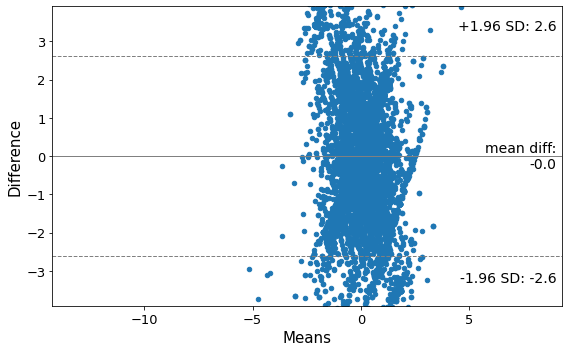

In [105]:
import statsmodels.api as sm
f, ax = plt.subplots(1, figsize = (8,5))
sm.graphics.mean_diff_plot(del_spo2_allN, del_SF_allN, ax = ax)

plt.show()

In [106]:
# pip install pyCompare

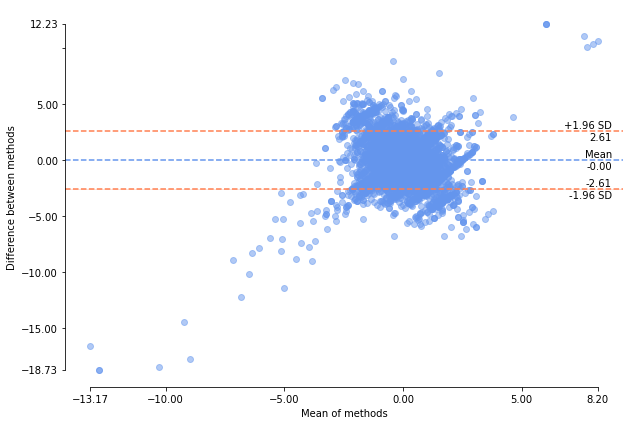

In [107]:
import pyCompare
# pyCompare.blandAltman(del_SF_allN, del_spo2_allN)
pyCompare.blandAltman(del_spo2_allN, del_SF_allN)

r and p-value are: 0.11617188263783124 1.8662282580993122e-58


Text(0.5, 1.0, '(b) Bland-Altman plot')

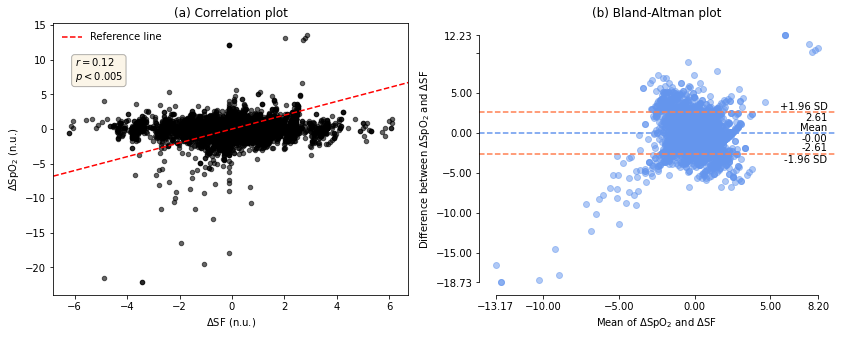

In [108]:
import scipy.stats

fig, axs = plt.subplots(1, 2, figsize =(14, 5))

axs[0].scatter(
     del_SF_allN, del_spo2_allN,
    c='k', s=20, alpha=0.6, marker='o'
)
# Get axis limits
left, right = axs[0].set_xlim()
# Reference line
axs[0].plot([left, right], [left, right], c='r', ls='--', label='Reference line')

r, p = scipy.stats.pearsonr(del_spo2_allN, del_SF_allN)
print(f'r and p-value are:', r, p)

axs[0].legend(frameon=False)
axs[0].set_xlabel('$\Delta$SF (n.u.)')
axs[0].set_ylabel('$\Delta$SpO$_2$ (n.u.)')

textstr = '\n'.join((r'$r=%.2f$' % (r),  r'$p<%.3f$' % (0.005 )))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
# place a text box in upper left in axes coords


axs[0].text(0.06, 0.88, textstr, transform=axs[0].transAxes, fontsize=10,
        verticalalignment='top', horizontalalignment='left', bbox=props)
axs[0].set_title('(a) Correlation plot')

pyCompare.blandAltman(del_spo2_allN, del_SF_allN, ax = axs[1])
axs[1].set_xlabel('Mean of $\Delta$SpO$_2$ and $\Delta$SF')
axs[1].set_ylabel('Difference between $\Delta$SpO$_2$ and $\Delta$SF')
axs[1].set_title('(b) Bland-Altman plot')
# axs[1].set_ylim([-10,10])

#plt.savefig('Data_Transfusion_VitalSigns_6_23_22/BlandAltman_delspo2_and_delSF_big.tif', dpi=300)

## Find Responders and NonResponders: 

**Responders:** In pre-SF range 1-100, if delta SF>=50, delta SPO2>=1 

**NonResponders:** In pre-SF range >300, if delta SF<=-50 and delta SpO2<=-1

In [109]:
ind_res = np.array(MSFbaseline_gp1.index)
Responders0 = df_transf.iloc[ind_res]
# Responders0[['deBedTime', 'PAT_ID', 'csn', 'Hb_collection_time', 'Hb', 'MedSPO2_beforeT', 'del_SPO2_3', 'del_Hb_3', 'del_SF_3']]
condi1 = Responders0['del_SF_3'] >= 50 
condi2 = Responders0['del_SPO2_3'] >= 0
Responders = Responders0[condi1 & condi2]
Responders[['deBedTime', 'PAT_ID', 'csn', 'Hb_collection_time', 'Hb', 'MedSPO2_beforeT', 'del_SPO2_3', 'del_Hb_3', 'del_SF_3']]

KeyError: "['deBedTime', 'PAT_ID', 'Hb_collection_time', 'MedSPO2_beforeT'] not in index"

In [ ]:
# del condi1, condi2
ind_nonres = np.array(MSFbaseline_gp4.index)
NonResponders0 = df_transf.iloc[ind_nonres]
# NonResponders0[['deBedTime', 'PAT_ID', 'csn', 'Hb_collection_time', 'Hb', 'MedSPO2_beforeT', 'del_SPO2_3', 'del_Hb_3', 'del_SF_3']]
condi1 = NonResponders0['del_SF_3'] <= -50 
condi2 = NonResponders0['del_SPO2_3'] <= 0
NonResponders = NonResponders0[condi1 & condi2]
NonResponders[['deBedTime', 'PAT_ID', 'csn', 'Hb_collection_time', 'Hb', 'MedSPO2_beforeT', 'del_SPO2_3', 'del_Hb_3', 'del_SF_3']]

In [ ]:
# # ###Saving them in pickle
# with open('Data_Transfusion_WaveformAnalysis_9_26_22/RespondersNonresponders.pickle', 'wb') as handle:
#     pickle.dump([Responders, NonResponders], handle, protocol=pickle.HIGHEST_PROTOCOL)


In [ ]:
# with open('Data_Transfusion_WaveformAnalysis_9_26_22/RespondersNonresponders.pickle', 'rb') as handle:
#     [Responders1, NonResponders1] = pickle.load(handle)

In [ ]:
# NonResponders1